# Model Project: Victor Li

Use of AI tools: Throughout this excercise I have used ChatGPT and Copilot to debug code.

# 0. Preliminary 

Here I import all the necessary modules and define plotting settings for consistency

In [1]:
# auto reload imported modules and necessary libraries
%load_ext autoreload
%autoreload 2
import numpy as np
import time

In [2]:
# Plotting settings
import matplotlib.pyplot as plt
plt.rcParams.update({'axes.grid':True,'grid.color':'black','grid.alpha':'0.25','grid.linestyle':'--'})
plt.rcParams.update({'font.size': 14})
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
# Import custom classes
from Worker import WorkerClass
from Government import GovernmentClass

# 1. Labor supply

## 1.1 Numerical optimizer vs. root-finder

## Excercise 1.1.1

In [4]:
# Plot utility as function of labor supply

def plot_utility_vs_labor(p, par=None):

    worker = WorkerClass(par)

    # a. define labor grid
    ells = np.linspace(0.5, worker.par.ell_max, 200)

    # b. compute utility for each ell
    Us = np.array([worker.value_of_choice(p, ell) for ell in ells])

    # c. plot
    plt.figure(figsize=(6,4))
    plt.plot(ells, Us)
    plt.xlabel(r'Labor supply $\ell$')
    plt.ylabel('Utility')
    plt.title('Utility as function of labor')
    plt.show()


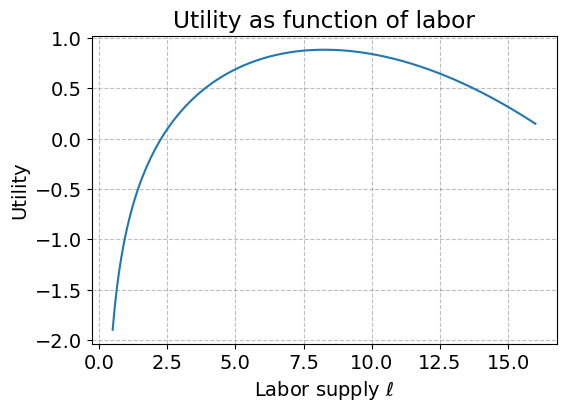

In [5]:
plot_utility_vs_labor(1.0)

The graph shows the concave utility function of the excercise as a function of labor supply: utility rises at first, reaches its maximum at the optimal labor supply (at around ℓ≈8.3) and then declines, as the disutility of work dominates.

## Excercise 1.1.2

In [6]:
# Plot FOC as function of labor supply

def plot_FOC_vs_labor(p=1.0, par=None):

    worker = WorkerClass(par)

    # a. define labor grid
    ells = np.linspace(0.5, worker.par.ell_max, 200)

    # b. compute FOC for each ell
    FOCs = np.array([worker.FOC(p, ell) for ell in ells])

    # c. plot
    plt.figure(figsize=(6,4))
    plt.plot(ells, FOCs)
    plt.axhline(0, color='black', linewidth=1)
    plt.xlabel(r'Labor supply $\ell$')
    plt.ylabel(r'FOC $\phi$')
    plt.title('FOC as function of labor')
    plt.show()


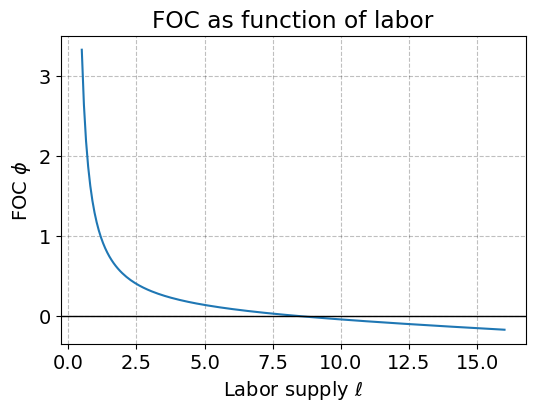

In [7]:
plot_FOC_vs_labor(p=1.0)

This graph shows the fist-order condition of the objective utility function ϕ(ℓ), a strictly decreasing function of labor that crosses zero at the optimal labor supply (at around ℓ≈8.3, where utility is maximized). For ϕ(ℓ)>0, utility increases with more labor, and for ϕ(ℓ)<0 utility decreases.

## Excercise 1.1.3

In [8]:
# Solve model using numerical optimization (OPT)

worker = WorkerClass()
sol = worker.optimal_choice(1.0)

print("Optimal labor supply using OPT =", sol.ell)


Optimal labor supply using OPT = 8.265578140757935


## Excercise 1.1.4

In [9]:
# Solve model using FOC and root finding (FOC)

worker = WorkerClass()
sol = worker.optimal_choice_FOC(1.0)

print("Optimal labor supply using FOC =", sol.ell)

Optimal labor supply using FOC = 8.26557815874913


Both solution methods, numerical optimization of the utility function and root-finding based on the first-order condition, deliver essentially identical optimal labor supply values (the small differences are due to numerical precision, nothing economic)

## Excercise 1.1.5

In [10]:
worker = WorkerClass()
p = 1.0

# Speed Numerical optimizer
t0 = time.perf_counter()
sol_opt = worker.optimal_choice(p)
t1 = time.perf_counter()
t_opt = t1 - t0

# Speed FOC root-finder
t0 = time.perf_counter()
sol_foc = worker.optimal_choice_FOC(p)
t1 = time.perf_counter()
t_foc = t1 - t0

# Speed ratio
if t_foc == 0:
    speed_ratio = float('inf')
else:
    speed_ratio = t_opt / t_foc
    
# Display nicely
print("="*50)
print("Optimal Labor Choice: Performance Summary")
print("="*50)

print("\nNumerical optimizer (utility maximization)")
print("-"*50)
print(f"  ell*            : {sol_opt.ell:12.6f}")
print(f"  U*              : {sol_opt.U:12.6f}")
print(f"  time            : {t_opt:12.6e} s")

print("\nFOC root-finder (solve FOC = 0)")
print("-"*50)
print(f"  ell*            : {sol_foc.ell:12.6f}")
print(f"  U*              : {sol_foc.U:12.6f}")
print(f"  time            : {t_foc:12.6e} s")

print("\nDifferences (FOC – OPT)")
print("-"*50)
print(f"  Δ ell*          : {sol_foc.ell - sol_opt.ell:12.2e}")
print(f"  Δ U             : {sol_foc.U   - sol_opt.U:12.2e}")

print("\nSpeed comparison")
print("-"*50)
print(f"  OPT / FOC speed : {speed_ratio:12.2f}x")

print("="*50)


Optimal Labor Choice: Performance Summary

Numerical optimizer (utility maximization)
--------------------------------------------------
  ell*            :     8.265578
  U*              :     0.882060
  time            : 3.944000e-04 s

FOC root-finder (solve FOC = 0)
--------------------------------------------------
  ell*            :     8.265578
  U*              :     0.882060
  time            : 5.329000e-04 s

Differences (FOC – OPT)
--------------------------------------------------
  Δ ell*          :     1.80e-08
  Δ U             :    -1.11e-16

Speed comparison
--------------------------------------------------
  OPT / FOC speed :         0.74x


Running this cell multiple times shows that the numerical optimizer is sometimes faster, and other times the FOC-based root solver wins. There’s no clear, consistent speed advantage for either method (both approaches are extremely fast).

## Excercise 1.1.6

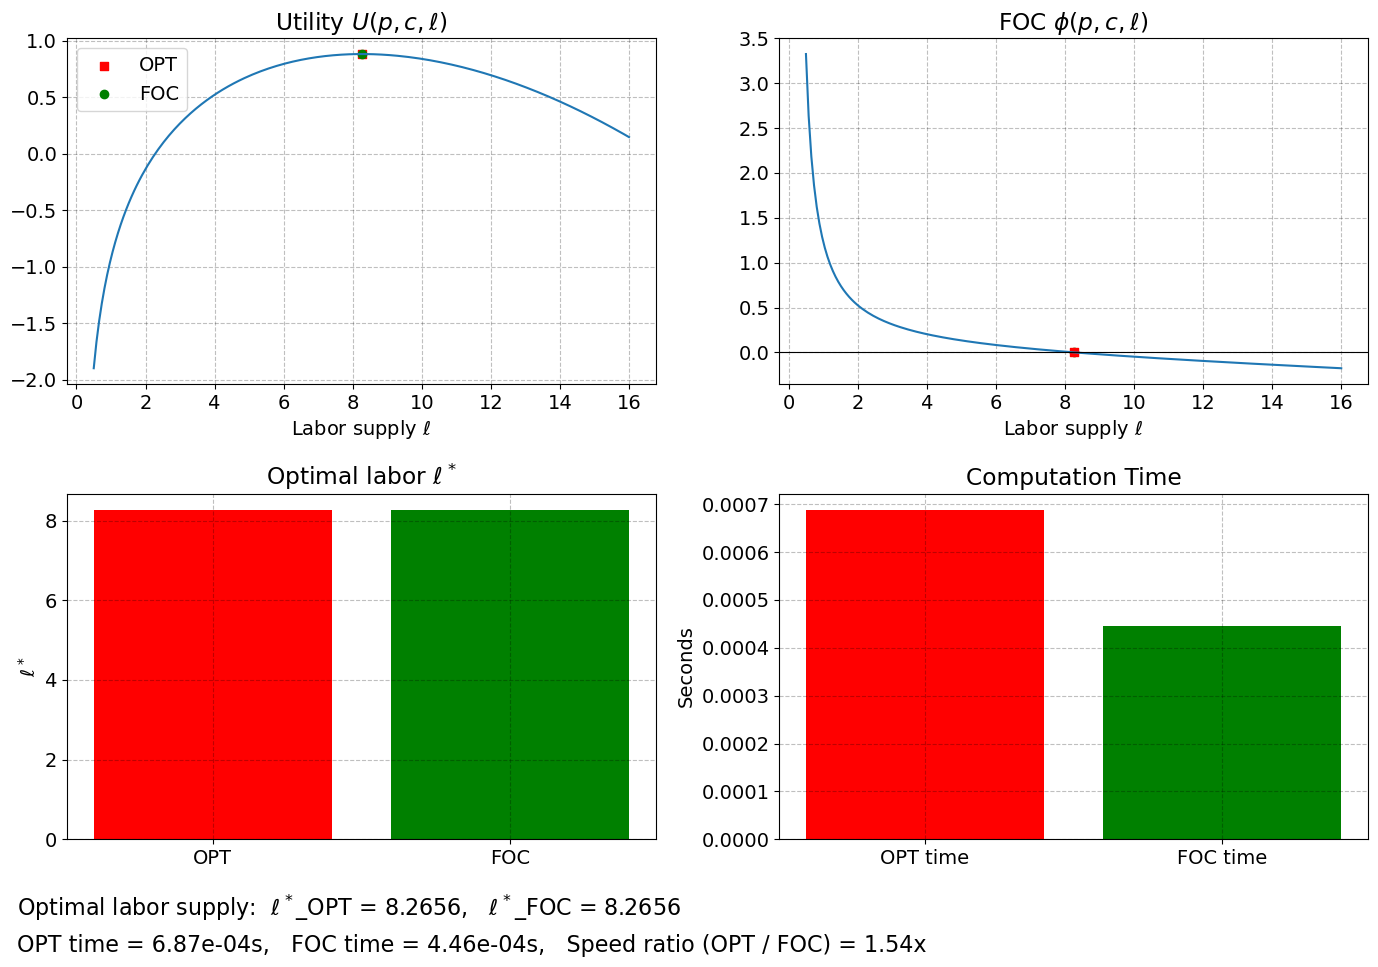

In [11]:
def plot_all_in_one(p, par=None):

    worker = WorkerClass(par)

    # --- 1. labor grid ---
    ells = np.linspace(0.5, worker.par.ell_max, 200)

    # compute utilities + FOCs
    Us  = np.array([worker.value_of_choice(p, ell) for ell in ells])
    FOCs = np.array([worker.FOC(p, ell) for ell in ells])

    # --- 2. solve for optima ---
    # numerical optimizer
    t0 = time.perf_counter()
    sol_opt = worker.optimal_choice(p)
    t1 = time.perf_counter()
    t_opt = t1 - t0

    # root-finder
    t0 = time.perf_counter()
    sol_foc = worker.optimal_choice_FOC(p)
    t1 = time.perf_counter()
    t_foc = t1 - t0

    # safe speed ratio
    if t_foc == 0:
        speed_ratio = float('inf')
    else:
        speed_ratio = t_opt / t_foc

    # --- 3. plotting ---
    fig = plt.figure(figsize=(14,9))

    # PANEL 1: Utility
    ax1 = fig.add_subplot(2,2,1)
    ax1.plot(ells, Us)
    ax1.scatter(sol_opt.ell, sol_opt.U, color="red", marker='s', label="OPT")
    ax1.scatter(sol_foc.ell, sol_foc.U, color="green", marker='o', label="FOC")
    ax1.set_title("Utility $U(p,c,\\ell)$")
    ax1.set_xlabel("Labor supply $\\ell$")
    ax1.legend()

    # PANEL 2: FOC
    ax2 = fig.add_subplot(2,2,2)
    ax2.plot(ells, FOCs)
    ax2.axhline(0, color="black", linewidth=0.8)
    ax2.scatter(sol_foc.ell, 0, color="green", marker='o')
    ax2.scatter(sol_opt.ell, 0, color="red", marker='s')
    ax2.set_title("FOC $\\phi(p,c,\\ell)$")
    ax2.set_xlabel("Labor supply $\\ell$")

    # PANEL 3: Optimal ell* values
    ax3 = fig.add_subplot(2,2,3)
    ax3.bar(["OPT", "FOC"], [sol_opt.ell, sol_foc.ell], color=["red","green"])
    ax3.set_title("Optimal labor $\\ell^*$")
    ax3.set_ylabel("$\\ell^*$")

    # PANEL 4: Speed comparison
    ax4 = fig.add_subplot(2,2,4)
    ax4.bar(["OPT time", "FOC time"], [t_opt, t_foc], color=["red","green"])
    ax4.set_title("Computation Time")
    ax4.set_ylabel("Seconds")

    plt.tight_layout()
    # --- Add text box with optimal values ---
    fig.text(
        0.02, -0.03,
        f"Optimal labor supply:  $\\ell^*$_OPT = {sol_opt.ell:.4f},   $\\ell^*$_FOC = {sol_foc.ell:.4f}",
        ha='left', fontsize=16
    )
    
    fig.text(
    0.02, -0.07,
    (
        f"OPT time = {t_opt:.2e}s,   FOC time = {t_foc:.2e}s,   "
        f"Speed ratio (OPT / FOC) = {speed_ratio:.2f}x"
    ),
    ha='left', fontsize=16
    )
    
    plt.show()   
    
plot_all_in_one(1)

## Excercise: Repeat with epsilon = 0.75

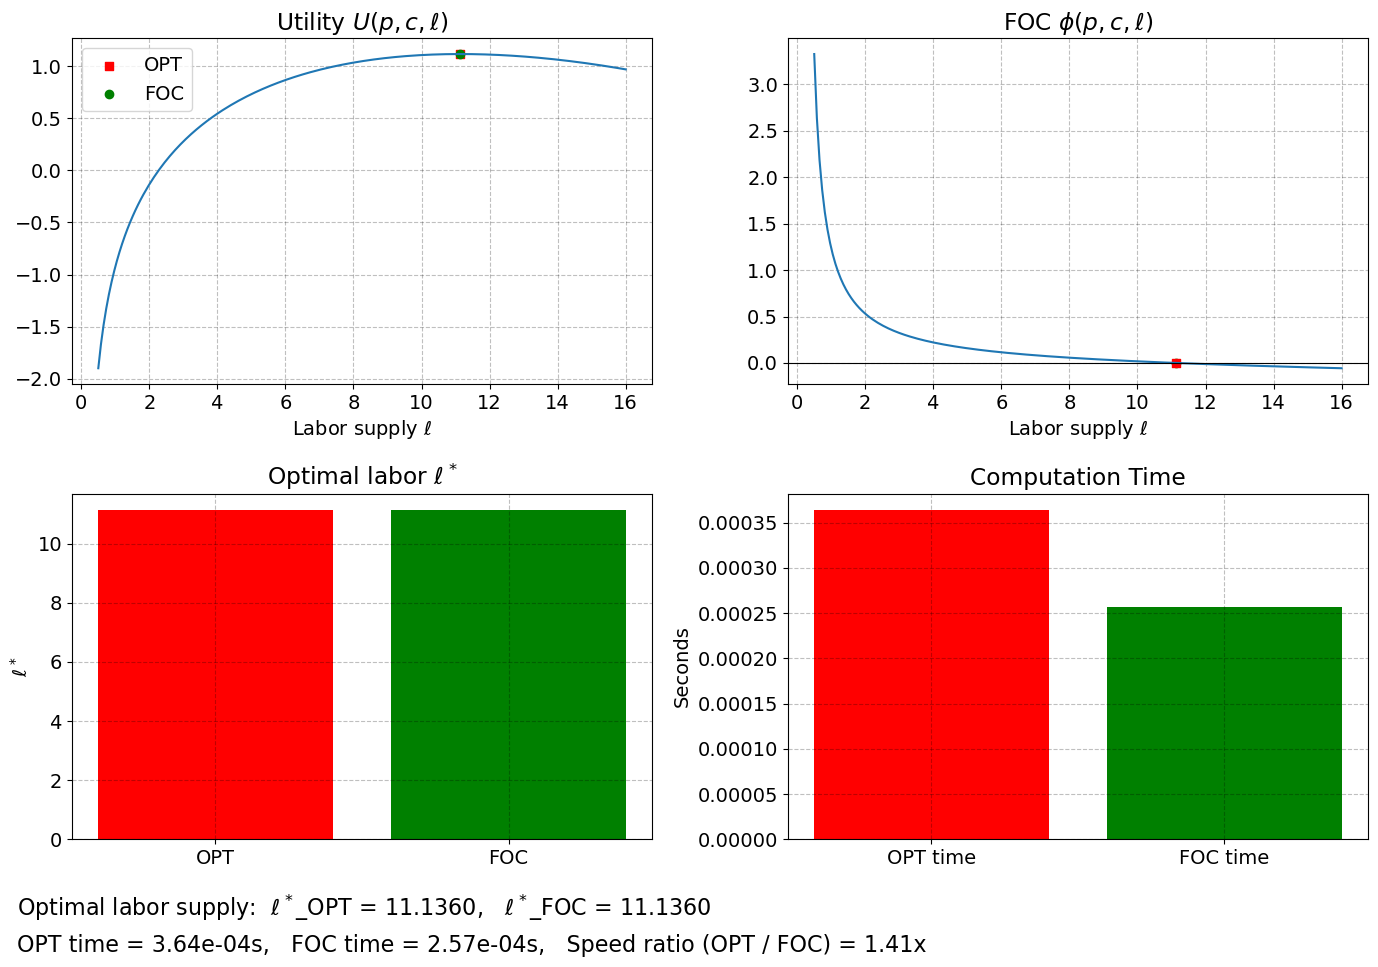

In [12]:
plot_all_in_one(1, par={"epsilon": 0.75})

## Excercise: Repeat with epsilon 0.5

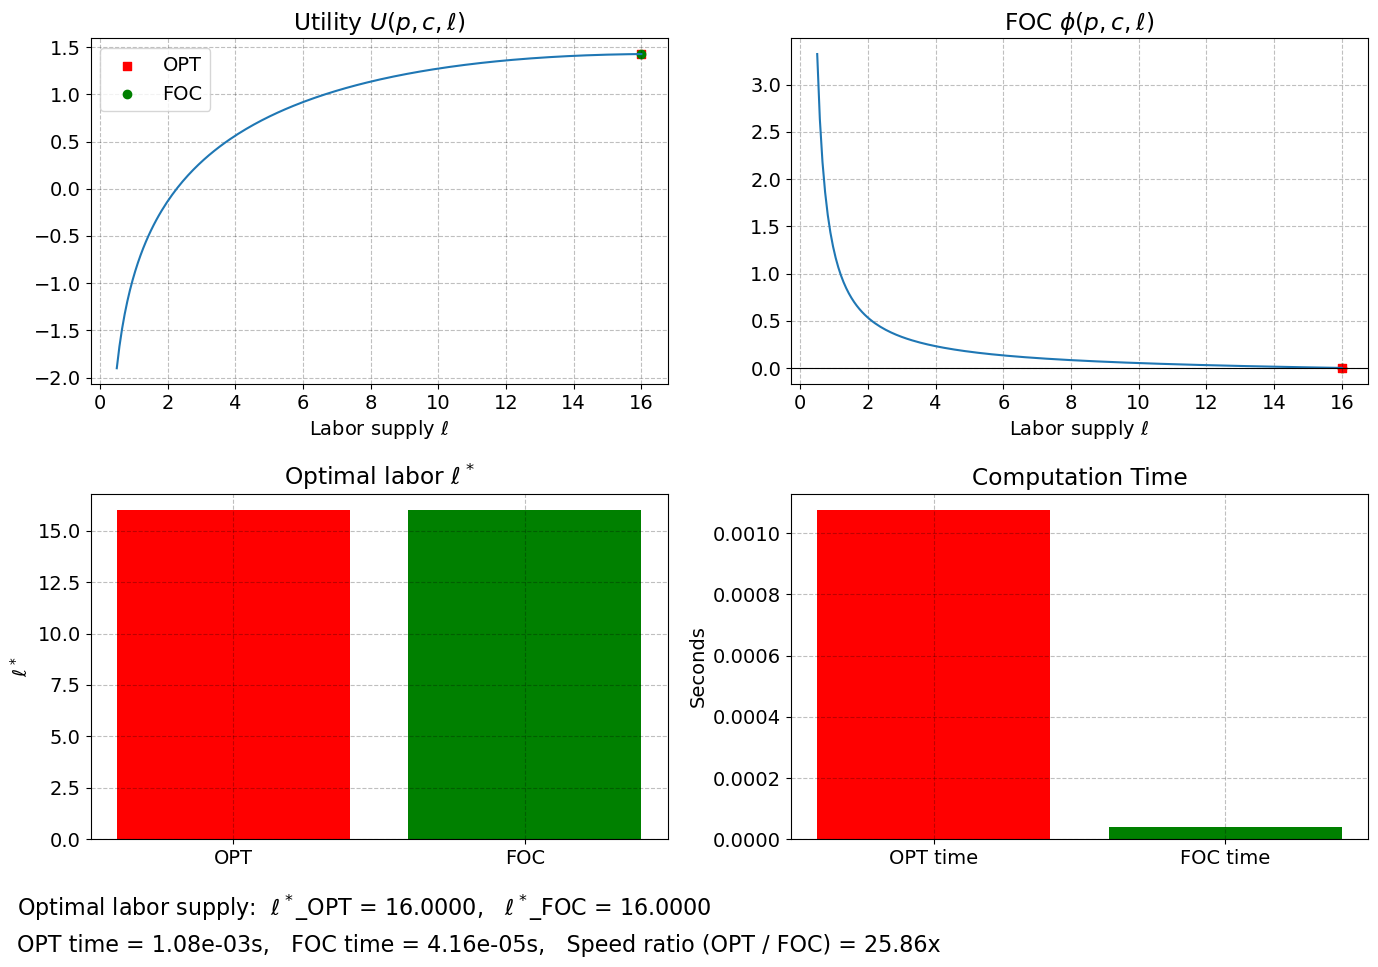

In [13]:
plot_all_in_one(1, par={"epsilon": 0.50})

At the corner solution, one thing becomes obvious: the numerical optimizer is consistently much slower than the FOC-based root finder. Even after running the computation several times, the optimizer takes noticeably longer. The reason is for me is the following: at a corner solution, we code the FOC method to jump straight to the right value, while the numerical optimizer still searches over the whole domain.

## 1.2 Labor supply function

## Excercise: 1.2.1

For Exercise 1.2.1, I plotted labor supply against productivity using both the numerical optimizer and the FOC-based solution (numerical optimizer first, then FOC). Visually, the results look identical, indicating that the results are correct

In [14]:
# Using numerical optimizer

def plot_labor_supply_function_OPT(par=None):

    worker = WorkerClass(par)

    # productivity grid from 0.5 to 3.0
    ps = np.linspace(0.5, 3.0, 100)

    # store optimal labor values
    ells_opt = np.zeros_like(ps)

    for i, p in enumerate(ps):
        sol = worker.optimal_choice(p)
        ells_opt[i] = sol.ell

    # plot
    plt.figure(figsize=(7,5))
    plt.plot(ps, ells_opt, color="blue", linewidth=2)
    plt.xlabel("Productivity $p_i$")
    plt.ylabel("Optimal labor supply $\\ell^*(p_i)$")
    plt.title("Labor supply function $\\ell^*(p)$ using OPT")
    plt.grid(True)
    plt.show()

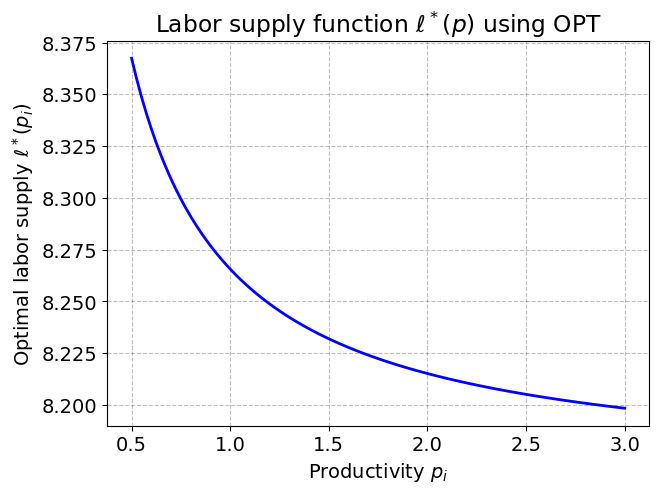

In [15]:
plot_labor_supply_function_OPT()

In [16]:
# Using FOC

def plot_labor_supply_function_FOC(par=None):

    worker = WorkerClass(par)

    # productivity grid from 0.5 to 3.0
    ps = np.linspace(0.5, 3.0, 100)

    # store optimal labor values
    ells_opt = np.zeros_like(ps)

    for i, p in enumerate(ps):
        sol = worker.optimal_choice_FOC(p)
        ells_opt[i] = sol.ell

    # plot
    plt.figure(figsize=(7,5))
    plt.plot(ps, ells_opt, color="blue", linewidth=2)
    plt.xlabel("Productivity $p_i$")
    plt.ylabel("Optimal labor supply $\\ell^*(p_i)$")
    plt.title("Labor supply function $\\ell^*(p)$ using FOC")
    plt.grid(True)
    plt.show()

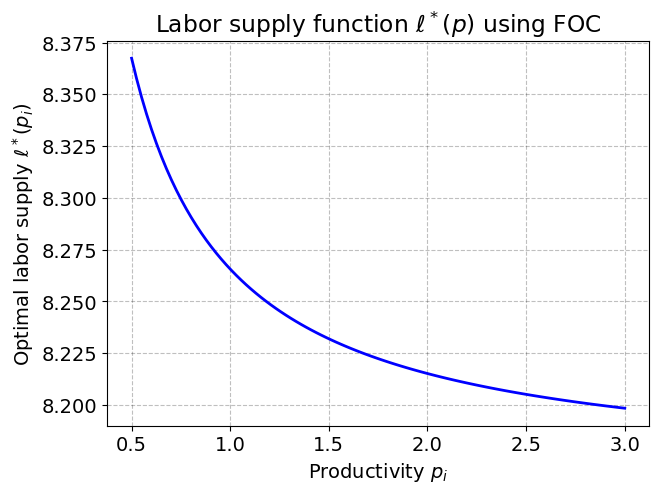

In [17]:
plot_labor_supply_function_FOC()

## Excercise: 1.2.2

I followed the same procedure here as in Excercise 1.2.1

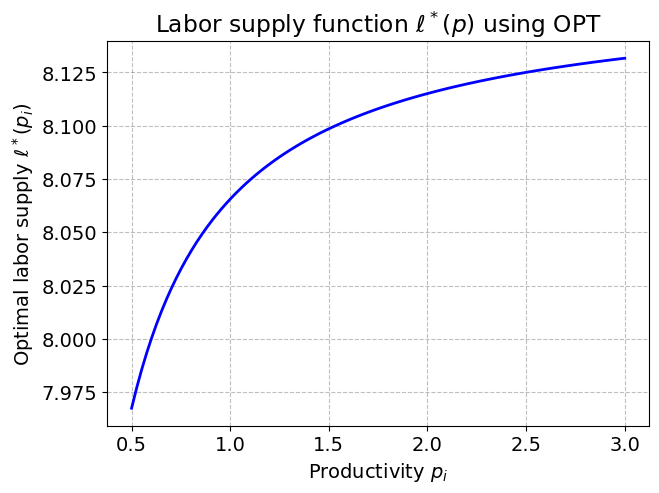

In [18]:
plot_labor_supply_function_OPT(par = {"zeta": -0.1})

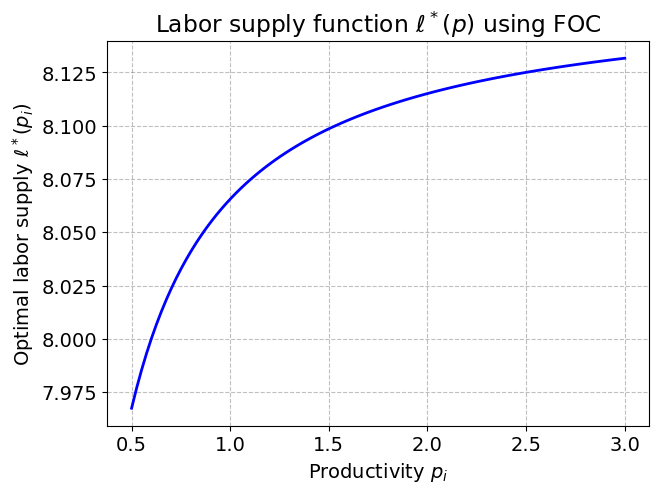

In [19]:
plot_labor_supply_function_FOC(par = {"zeta": -0.1})

Comparing the results from 1.2.1 (positive ζ, a lump-sum tax) and 1.2.2 (negative ζ, a lump-sum transfer), we see opposite patterns: with a lump-sum tax (positive $\zeta$), optimal labor supply decreases as productivity rises, whereas with a lump-sum transfer (negative $\zeta$), optimal labor supply increases in productivity.


# 2: Public Good

## 2.1: Tax revenue and Social Welfare Function

## Excercise: 2.1.1

In [20]:
# 1. Create government object
gov = GovernmentClass()

# 2. Set tax parameters
gov.par.tau = 0.50
gov.par.zeta = 0.10

# 3. Step 1: draw productivities
gov.draw_productivities()

# 4. Step 2: solve workers' optimal labor supply
gov.solve_workers()

# 5. Step 3: compute tax revenue
T = gov.tax_revenue()

# 6. Step 4: compute social welfare
W = gov.SWF()

print(f"Tax revenue T(τ,ζ) = {T:.4f}")
print(f"Social welfare SWF(τ,ζ) = {W:.4f}")


Tax revenue T(τ,ζ) = 417.9118
Social welfare SWF(τ,ζ) = 174.0453


## Excercise: 2.2.2

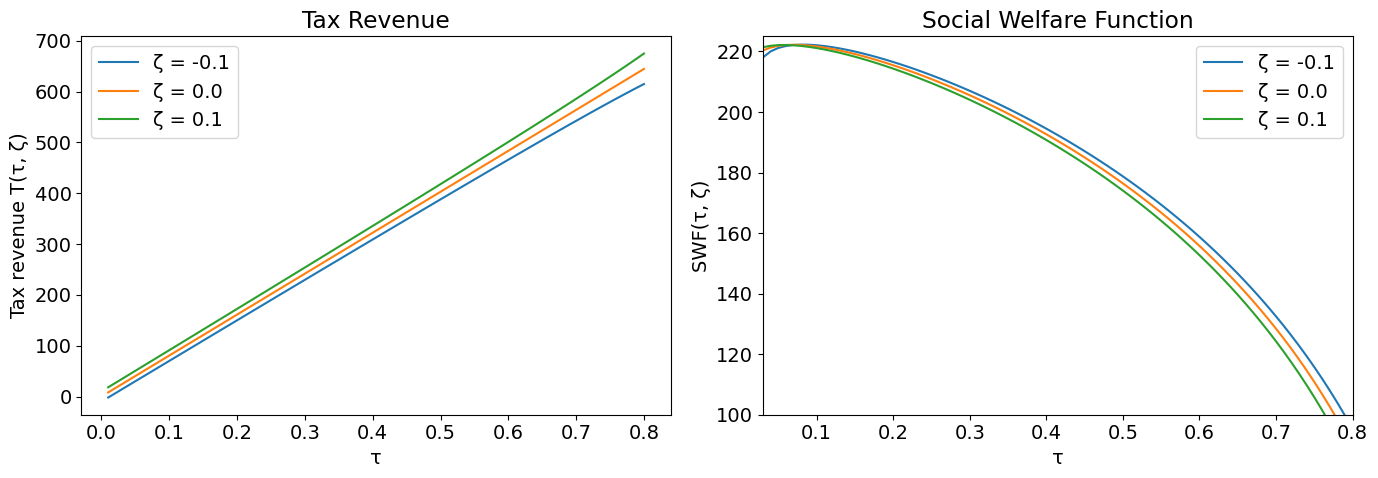

In [21]:
def plot_T_and_SWF():
    # --- Setup government object ---
    gov = GovernmentClass()
    gov.draw_productivities()   # Step 1: draw productivities

    # --- Grids ---
    zeta_list = [-0.1, 0.0, 0.1]
    tau_grid = np.linspace(0.01, 0.80, 80)

    # --- Storage ---
    T_results = {z: [] for z in zeta_list}
    SWF_results = {z: [] for z in zeta_list}

    # --- Loop ---
    for z in zeta_list:
        gov.par.zeta = z

        for tau in tau_grid:
            gov.par.tau = tau

            gov.solve_workers()      # Step 2: compute optimal ell_i
            T_results[z].append(gov.tax_revenue())  # Step 3: Tax revenue
            SWF_results[z].append(gov.SWF())        # Step 4: Social welfare

    # --- Create side-by-side figure ---
    fig, axes = plt.subplots(1, 2, figsize=(14,5))

    # LEFT PANEL: Tax Revenue
    ax1 = axes[0]
    for z in zeta_list:
        ax1.plot(tau_grid, T_results[z], label=f"ζ = {z}")
    ax1.set_xlabel("τ")
    ax1.set_ylabel("Tax revenue T(τ, ζ)")
    ax1.set_title("Tax Revenue")
    ax1.legend()
    ax1.grid()

    # RIGHT PANEL: SWF
    ax2 = axes[1]
    for z in zeta_list:
        ax2.plot(tau_grid, SWF_results[z], label=f"ζ = {z}")
    ax2.set_xlabel("τ")
    ax2.set_ylabel("SWF(τ, ζ)")
    ax2.set_title("Social Welfare Function")
    ax2.legend()
    ax2.grid()
    ax2.set_xlim(0.03, 0.8)
    ax2.set_ylim(100, 225)

    plt.tight_layout()
    plt.show()


# Run it
plot_T_and_SWF()


The left panel shows the government's tax revenue. Tax revenue increases almost linearly with the tax rate, and higher lump-sum taxes simply shift the revenue curve upward.  

The right panel shows the Social Welfare Function, which is single-peaked in τ.

## Excercise: 2.1.3

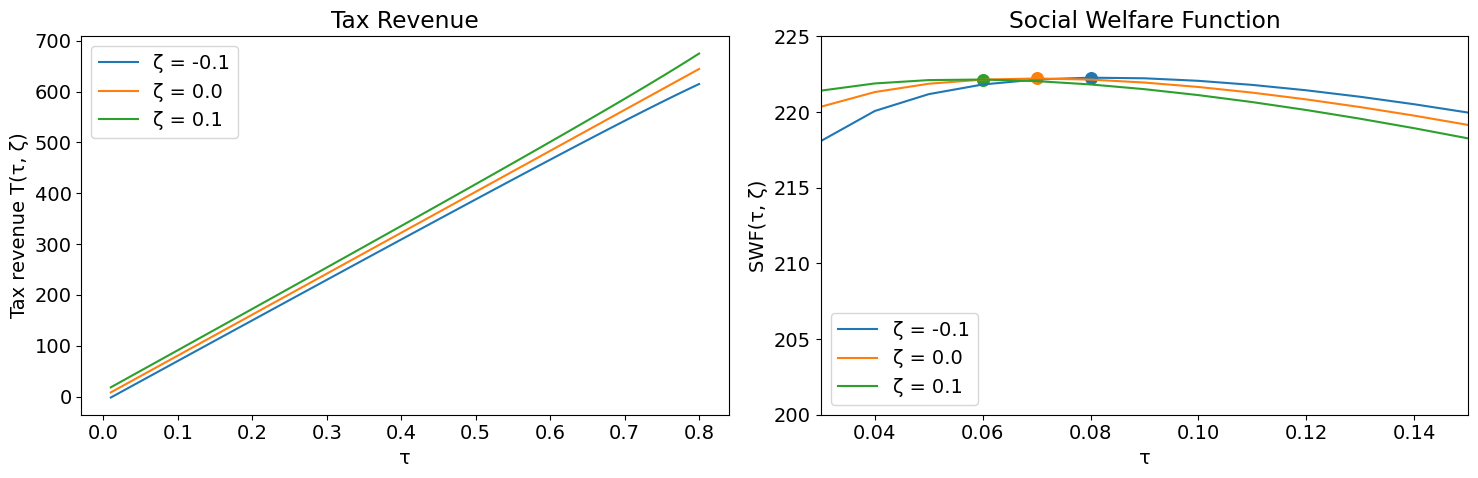

In [22]:
def plot_T_and_SWF_with_optima():

    # --- Setup government object ---
    gov = GovernmentClass()
    gov.draw_productivities()

    # --- Grids ---
    zeta_list = [-0.1, 0.0, 0.1]
    tau_grid = np.linspace(0.01, 0.80, 80)

    # --- Storage ---
    T_results  = {z: [] for z in zeta_list}
    SWF_results = {z: [] for z in zeta_list}

    # --- Loop over zeta and tau ---
    for z in zeta_list:
        gov.par.zeta = z
        for tau in tau_grid:
            gov.par.tau = tau
            gov.solve_workers()
            T_results[z].append(gov.tax_revenue())
            SWF_results[z].append(gov.SWF())

    # --- Create side-by-side figure ---
    fig, axes = plt.subplots(1, 2, figsize=(15,5))

    # =====================================
    # LEFT PANEL: TAX REVENUE T(τ, ζ)
    # =====================================
    ax1 = axes[0]

    for z in zeta_list:
        ax1.plot(tau_grid, T_results[z], label=f"ζ = {z}")

    ax1.set_xlabel("τ")
    ax1.set_ylabel("Tax revenue T(τ, ζ)")
    ax1.set_title("Tax Revenue")
    ax1.legend()
    ax1.grid()

    # =====================================
    # RIGHT PANEL: SWF(τ, ζ) + OPTIMA
    # =====================================
    ax2 = axes[1]

    for z in zeta_list:
        swf_z = np.array(SWF_results[z])
        
        # main curve
        line, = ax2.plot(tau_grid, swf_z, label=f"ζ = {z}")
        curve_color = line.get_color()

        # locate optimum
        idx_max = np.nanargmax(swf_z)
        tau_max = tau_grid[idx_max]
        swf_max = swf_z[idx_max]

        # add colored dot for optimum
        ax2.scatter(tau_max, swf_max, s=70, marker='o', color=curve_color)

    ax2.set_xlabel("τ")
    ax2.set_ylabel("SWF(τ, ζ)")
    ax2.set_title("Social Welfare Function")
    ax2.legend()
    ax2.grid()
    ax2.set_xlim(0.03, 0.15)
    ax2.set_ylim(200, 225)

    plt.tight_layout()
    plt.show()

plot_T_and_SWF_with_optima()


In the right panel, one interesting fact is noticeable: for very small tax rates τ (below the optimal τ values), a higher lump-sum tax ζ actually increases social welfare.  
However, for higher tax rates τ, a larger lump-sum transfer ζ increases welfare instead.


## 2.2: Optimal tax system

## Excercise: 2.2.1

In [23]:
gov = GovernmentClass()
gov.draw_productivities()

tau_opt, zeta_opt, SWF_opt = gov.optimal_taxes(-2.0, -1445.0) # Save tau_opt, zeta_opt for later use, -2 and -1445 are initial guesses

print("Optimal tau =", tau_opt)
print("Optimal zeta =", zeta_opt)
print("Max SWF =", SWF_opt)

Optimal tau = 0.13678676379638446
Optimal zeta = -0.5235908366875703
Max SWF = 222.38407323323224


## Excercise: 2.2.2

In [24]:
gov = GovernmentClass()
gov.draw_productivities()

initial_guesses = [
    (0.1, -0.2),
    (0.5,  0.0),
    (0.7,  -0.3),
    (-6, 1447.0),   
]

results = []

for tau0, zeta0 in initial_guesses:
    gov.par.tau = tau0
    gov.par.zeta = zeta0
    
    tau_star, zeta_star, swf_star = gov.optimal_taxes(tau0, zeta0)
    
    results.append((tau0, zeta0, tau_star, zeta_star, swf_star))
    print(f"Start τ={tau0}, ζ={zeta0}  →  Opt τ*={tau_star:.4f}, ζ*={zeta_star:.4f},   SWF={swf_star:.4f}")


Start τ=0.1, ζ=-0.2  →  Opt τ*=0.1368, ζ*=-0.5236,   SWF=222.3841
Start τ=0.5, ζ=0.0  →  Opt τ*=0.1368, ζ*=-0.5236,   SWF=222.3841
Start τ=0.7, ζ=-0.3  →  Opt τ*=0.1368, ζ*=-0.5236,   SWF=222.3841
Start τ=-6, ζ=1447.0  →  Opt τ*=0.1368, ζ*=-0.5236,   SWF=222.3841


Exercise 2.2.1 and 2.2.2 show that the choice of starting values does not matter for the numerical optimizer. It converges reliably for reasonable guesses like (0.1, –0.2) or (0.5, 0), as well as for completely gibberish ones such as (–2.0, –1445.0) or (–6.0, 1447.0).

## Excercise: 2.2.3

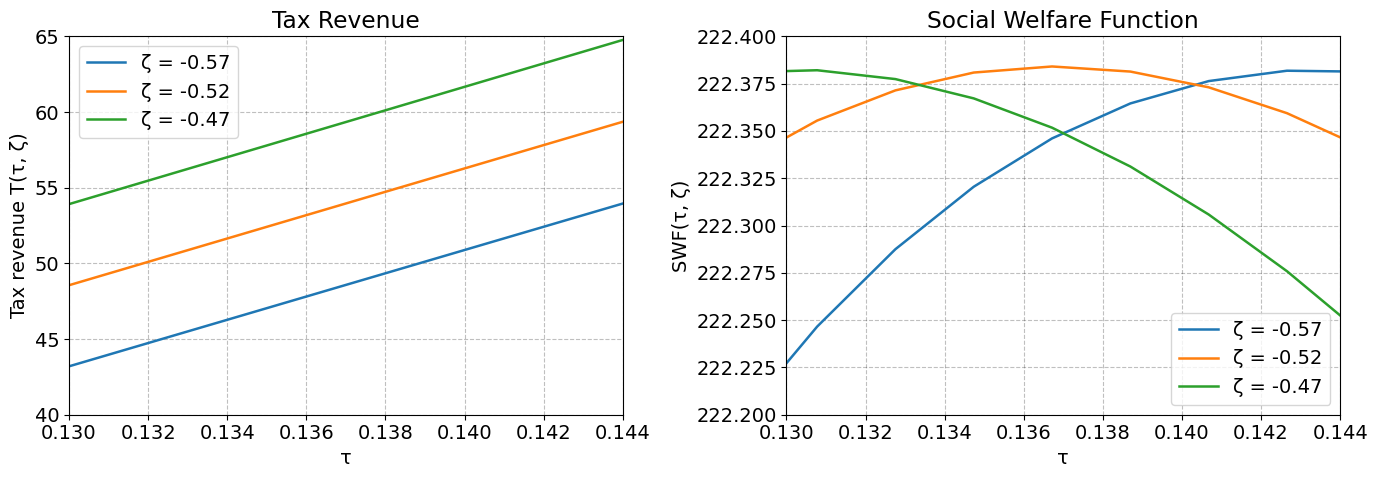

In [25]:
def plot_T_and_SWF_zoomed_in():

    # --- Setup government object ---
    gov = GovernmentClass()
    gov.draw_productivities()

    # --- zeta grid: baseline ± 0.05 ---
    zeta_list = [zeta_opt - 0.05, zeta_opt, zeta_opt + 0.05]

    # --- finer tau grid for smoother curves ---
    tau_grid = np.linspace(0.01, 0.80, 400)

    # --- storage dictionaries ---
    T_results = {z: [] for z in zeta_list}
    SWF_results = {z: [] for z in zeta_list}

    # --- loop ---
    for z in zeta_list:
        gov.par.zeta = z

        for tau in tau_grid:
            gov.par.tau = tau

            gov.solve_workers()
            T_results[z].append(gov.tax_revenue())
            SWF_results[z].append(gov.SWF())

    # --- create figure ---
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # === Left panel: Tax revenue ===
    ax = axes[0]
    for z in zeta_list:
        ax.plot(tau_grid, T_results[z], label=f"ζ = {z:.2f}", linewidth=1.8)
    ax.set_xlabel("τ")
    ax.set_ylabel("Tax revenue T(τ, ζ)")
    ax.set_title("Tax Revenue")
    ax.grid(True)
    ax.set_xlim(0.13, 0.144)
    ax.set_ylim(40, 65)
    ax.legend()

    # === Right panel: SWF ===
    ax = axes[1]
    for z in zeta_list:
        ax.plot(tau_grid, SWF_results[z], label=f"ζ = {z:.2f}", linewidth=1.8)
    ax.set_xlabel("τ")
    ax.set_ylabel("SWF(τ, ζ)")
    ax.set_title("Social Welfare Function")
    ax.grid(True)
    ax.set_xlim(0.13, 0.144)
    ax.set_ylim(222.2, 222.4)
    ax.legend()

    plt.tight_layout()
    plt.show()


# Run
plot_T_and_SWF_zoomed_in()


This plot visually confirms that the combination of a ζ value around 0.52 and a tax rate τ of about 0.1368 produces the highest possible level of social welfare.

## Excercise: 2.2.4

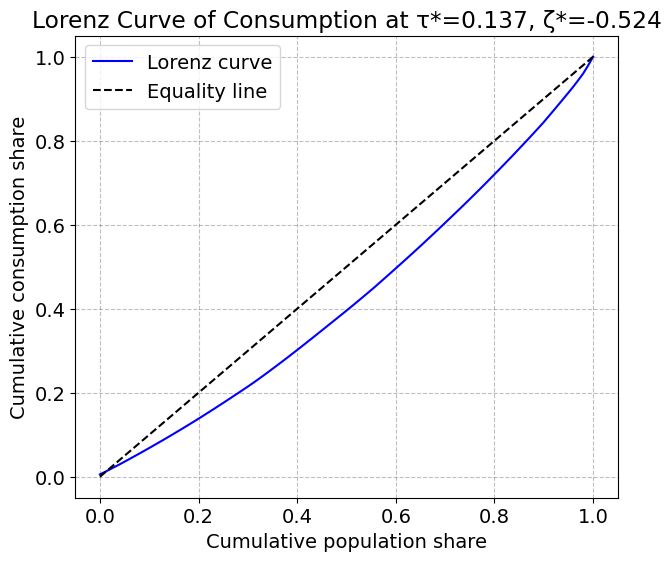

In [26]:
def plot_lorenz_curve(tau_star, zeta_star):

    # --- 1. Create government object ---
    gov = GovernmentClass()
    gov.draw_productivities()

    # --- 2. Set optimal tax parameters ---
    gov.par.tau = tau_star
    gov.par.zeta = zeta_star

    # --- 3. Solve workers for consumption ---
    gov.solve_workers()
    c = np.sort(gov.sol.c_opt)   # sorted consumption
    
    # --- 4. Compute Lorenz coordinates ---
    N = len(c)
    cum_pop = np.linspace(0, 1, N)
    cum_cons = np.cumsum(c) / np.sum(c)

    # --- 5. Plot ---
    plt.figure(figsize=(7,6))
    plt.plot(cum_pop, cum_cons, label="Lorenz curve", color="blue")
    plt.plot([0,1], [0,1], label="Equality line", linestyle="--", color="black")

    plt.title(f"Lorenz Curve of Consumption at τ*={tau_star:.3f}, ζ*={zeta_star:.3f}")
    plt.xlabel("Cumulative population share")
    plt.ylabel("Cumulative consumption share")
    plt.legend()
    plt.grid(True)
    plt.show()


# --- RUN IT ---
plot_lorenz_curve(tau_star, zeta_star)


From the Lorenz curve, we see that consumption remains unequal at the optimal policy ζ* and τ*. For instance, the poorest 50% of individuals consume only about 35% of total consumption, while the richest 50% account for roughly 65%. Similarly, the bottom 20% consume only around 12% of total consumption, showing that even at the optimal social welfare, consumption is still concentrated among higher-productivity individuals.


# 3: Top tax

## 3.1: Labor supply

## Excercise: 3.1.1

In [27]:
def plot_utility_vs_labor_with_kink(p, tau_star, zeta_star, kappa=9, omega=0.2):

    # --- pass calibration parameters into worker ---
    par = {
        'tau': tau_star,
        'zeta': zeta_star,
        'kappa': kappa,
        'omega': omega
    }
    worker = WorkerClass(par)

    # --- labor grid ---
    ells = np.linspace(0.5, worker.par.ell_max, 200)

    # --- compute utility ---
    Us = []
    for ell in ells:
        c = worker.post_tax_income(p, ell)
        if c <= 0:
            Us.append(np.nan)   # avoid log(c<=0)
        else:
            Us.append(worker.utility(c, ell))

    Us = np.array(Us)

    # --- plot ---
    plt.figure(figsize=(6,4))
    plt.plot(ells, Us, label="Utility U(ℓ)")
    
    # mark kink
    ell_kink = kappa / (worker.par.w * p)
    plt.axvline(ell_kink, color='red', linestyle='--', label='kink')
    
    plt.xlabel(r'Labor supply $\ell$')
    plt.ylabel('Utility')
    plt.title('Utility as function of labor (with kink)')
    plt.legend()
    plt.grid(True)
    plt.show()


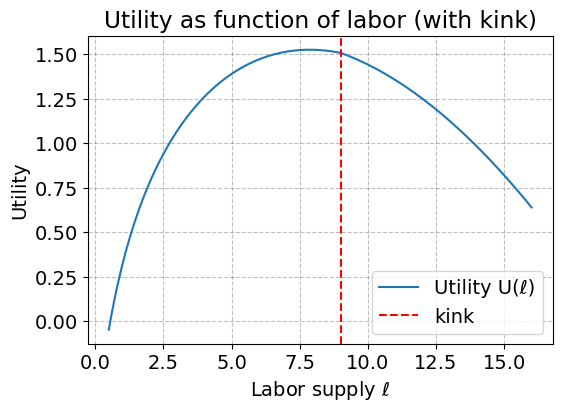

In [28]:
plot_utility_vs_labor_with_kink(
    p=1.0,
    tau_star=tau_opt,
    zeta_star=zeta_opt,
    kappa=9,
    omega=0.2
)


The utility curve is continuous and concave, reaching its maximum at an interior labor supply level before declining as work becomes increasingly costly. The red dashed line marks the labor supply at which the top tax rate takes effect. Beyond that point, utility appears to fall more rapidly in labor, compared to if there were no top tax. For a worker with productivity level 1, the highest utility is achieved before the top tax takes effect

## Excercise: 3.1.2

In [29]:
def plot_FOC_below_kink(p, tau_star, zeta_star, kappa=9, omega=0.2):

    # set worker parameters
    par = {
        'tau': tau_star,
        'zeta': zeta_star,
        'kappa': kappa,
        'omega': omega
    }
    worker = WorkerClass(par)

    ell_kink = kappa / (worker.par.w * p)

    # grid below kink
    ells = np.linspace(0.5, ell_kink, 200)
    
    # FOC below kink (omega = 0)
    phis = np.array([worker.FOC(p, ell, omega=0.0) for ell in ells])

    plt.figure(figsize=(6,4))
    plt.plot(ells, phis, label="FOC below kink")
    plt.axhline(0, color='black', linestyle='--')
    plt.axvline(ell_kink, color='red', linestyle='--', label='kink')

    plt.xlabel(r'Labor supply $\ell$')
    plt.ylabel(r'FOC $\phi(\ell)$')
    plt.title(r'FOC below kink')
    plt.grid(True)
    plt.legend()
    plt.show()


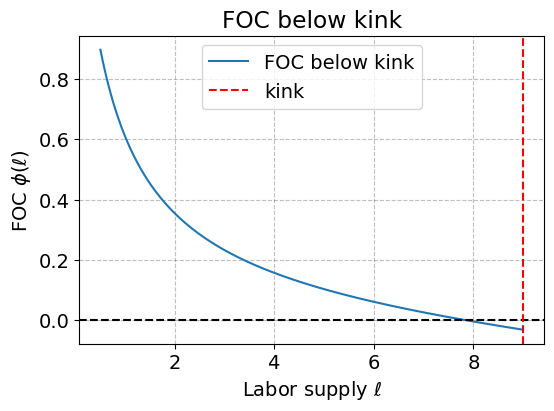

In [30]:
plot_FOC_below_kink(1.0, tau_opt, zeta_opt)


## Excercise: 3.1.3

In [31]:
def plot_FOC_above_kink(p, tau_star, zeta_star, kappa=9, omega=0.2):

    par = {
        'tau': tau_star,
        'zeta': zeta_star,
        'kappa': kappa,
        'omega': omega
    }
    worker = WorkerClass(par)

    ell_kink = kappa / (worker.par.w * p)

    # grid above kink
    ells = np.linspace(ell_kink, worker.par.ell_max, 200)
    
    # FOC above kink (omega applies)
    phis = np.array([worker.FOC(p, ell, omega=omega) for ell in ells])

    plt.figure(figsize=(6,4))
    plt.plot(ells, phis, label="FOC above kink")
    plt.axhline(0, color='black', linestyle='--')
    plt.axvline(ell_kink, color='red', linestyle='--', label='kink')

    plt.xlabel(r'Labor supply $\ell$')
    plt.ylabel(r'FOC $\phi(\ell)$')
    plt.title(r'FOC above kink')
    plt.grid(True)
    plt.legend()
    plt.show()


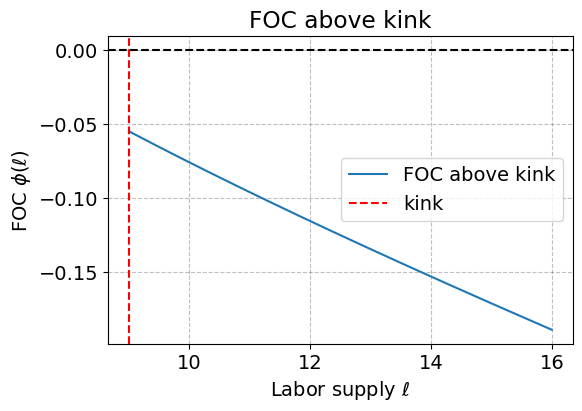

In [32]:
plot_FOC_above_kink(1.0, tau_opt, zeta_opt)

Excercise 3.1.2 and 3.1.3 show how the FOC behaves with a top tax: Below the kink, the FOC curve is curved and gradually flattens as labor increases. Once the top tax applies, the FOC drops linearly, indicating a sharper disincentive to supply additional labor.

## Excercise: 3.1.4

In [33]:
# Solve worker problem with numerical optimizer 

worker = WorkerClass()
worker.par.kappa = 9
worker.par.omega = 0.2
worker.par.tau = tau_opt
worker.par.zeta = zeta_opt

sol = worker.optimal_choice(1.0)

print("Optimal labor supply using OPT =", sol.ell)


Optimal labor supply using OPT = 7.867316263636792


## Excercise: 3.1.5

In [34]:
# Solve worker problem with numerical optimizer 

worker = WorkerClass()
worker.par.kappa = 9
worker.par.omega = 0.2
worker.par.tau = tau_opt
worker.par.zeta = zeta_opt

sol = worker.optimal_choice_FOC(1.0)

print("Optimal labor supply using FOC =", sol.ell)


Optimal labor supply using FOC = 7.86731627293025


Also in the augmented model with top tax, both solution methods, numerical optimization of the utility function and root-finding based on the first-order condition, deliver essentially identical optimal labor supply values (the small differences are due to numerical precision, nothing economic)

## Excercise: 3.1.6

In [35]:
# === Set up worker with kink ===
worker = WorkerClass({
    'tau': tau_opt,
    'zeta': zeta_opt,
    'kappa': 9.0,
    'omega': 0.20
})

p = 1.0

# --- Numerical optimizer ---
t0 = time.perf_counter()
sol_opt = worker.optimal_choice(p)
t1 = time.perf_counter()
t_opt = t1 - t0

# --- FOC 4-step method ---
t0 = time.perf_counter()
sol_foc = worker.optimal_choice_FOC(p)
t1 = time.perf_counter()
t_foc = t1 - t0

# --- Speed ratio ---
speed_ratio = float('inf') if t_foc == 0 else t_opt / t_foc


# Nice summary printout

print("="*50)
print("Optimal Labor Choice with Kinked Tax: Performance Summary")
print("="*50)

print("\nNumerical optimizer (utility maximization)")
print("-"*50)
print(f"  ell*            : {sol_opt.ell:12.6f}")
print(f"  U*              : {sol_opt.U:12.6f}")
print(f"  time            : {t_opt:12.6e} s")

print("\nFOC 4-step method (solve FOC in sections)")
print("-"*50)
print(f"  ell*            : {sol_foc.ell:12.6f}")
print(f"  U*              : {sol_foc.U:12.6f}")
print(f"  time            : {t_foc:12.6e} s")
print(f"  chosen section  : {sol_foc.section}")

print("\nDifferences (FOC – OPT)")
print("-"*50)
print(f"  Δ ell*          : {sol_foc.ell - sol_opt.ell:12.2e}")
print(f"  Δ U             : {sol_foc.U   - sol_opt.U:12.2e}")

print("\nSpeed comparison")
print("-"*50)
print(f"  OPT / FOC speed : {speed_ratio:12.2f}x")

print("="*50)


Optimal Labor Choice with Kinked Tax: Performance Summary

Numerical optimizer (utility maximization)
--------------------------------------------------
  ell*            :     7.867316
  U*              :     1.525685
  time            : 1.067200e-03 s

FOC 4-step method (solve FOC in sections)
--------------------------------------------------
  ell*            :     7.867316
  U*              :     1.525685
  time            : 9.589000e-04 s
  chosen section  : below

Differences (FOC – OPT)
--------------------------------------------------
  Δ ell*          :     9.29e-09
  Δ U             :     0.00e+00

Speed comparison
--------------------------------------------------
  OPT / FOC speed :         1.11x


The results now differ slightly from Exercise 1: after running the cell multiple times, the numerical optimizer tends to be a little bit faster on average, with a typical speed ratio of around 0.8. Although the method using FOC is still sometimes faster so I cannot say for certain.

## Excercise: 3.1.7

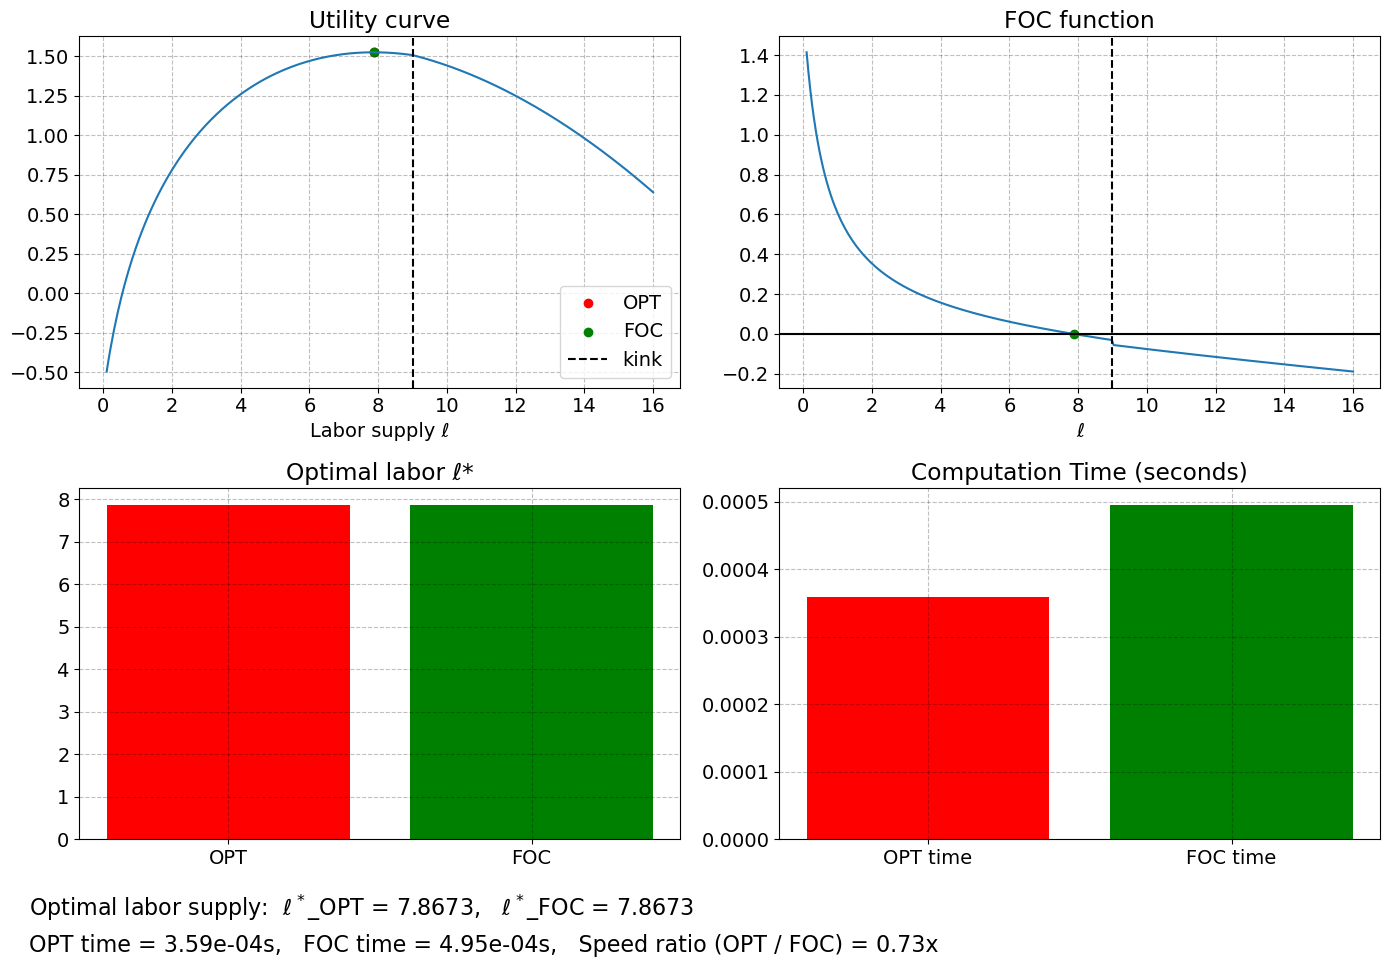

In [36]:
def plot_all_in_one_with_kink(p, tau_star, zeta_star, kappa=9, omega=0.2):

    par = {
        'tau': tau_star,
        'zeta': zeta_star,
        'kappa': kappa,
        'omega': omega
    }
    worker = WorkerClass(par)

    ell_kink = None
    if not np.isnan(worker.par.kappa):
        ell_kink = worker.par.kappa / (worker.par.w * p)

    # === 1. labor grid ===
    ells = np.linspace(0.1, worker.par.ell_max, 300)

    # === 2. compute utilities ===
    Us = np.array([worker.value_of_choice(p, ell) for ell in ells])

    # === 3. compute FOCs with kink-aware omega ===
    FOCs = np.zeros_like(ells)
    for i, ell in enumerate(ells):
        if ell_kink is not None and ell > ell_kink:
            FOCs[i] = worker.FOC(p, ell, omega=worker.par.omega)
        else:
            FOCs[i] = worker.FOC(p, ell, omega=0.0)

    # === 4. solve optimal labor ===
    import time
    t0 = time.perf_counter()
    sol_opt = worker.optimal_choice(p)   # numerical optimizer
    t1 = time.perf_counter()
    t_opt = t1 - t0

    t0 = time.perf_counter()
    sol_foc = worker.optimal_choice_FOC(p)  # 4-step kink method
    t1 = time.perf_counter()
    t_foc = t1 - t0

    speed_ratio = float('inf') if t_foc == 0 else t_opt / t_foc

    # === 5. plotting ===
    fig = plt.figure(figsize=(14,9))

    # PANEL 1 – Utility curve
    ax1 = fig.add_subplot(2,2,1)
    ax1.plot(ells, Us)
    ax1.scatter(sol_opt.ell, sol_opt.U, color="red", label="OPT")
    ax1.scatter(sol_foc.ell, sol_foc.U, color="green", label="FOC")
    if ell_kink:
        ax1.axvline(ell_kink, color="black", linestyle="--", label="kink")
    ax1.set_title("Utility curve")
    ax1.set_xlabel("Labor supply ℓ")
    ax1.legend()

    # PANEL 2 – FOC curve
    ax2 = fig.add_subplot(2,2,2)
    ax2.plot(ells, FOCs)
    ax2.axhline(0, color="black")
    if ell_kink:
        ax2.axvline(ell_kink, color="black", linestyle="--", label="kink")
    ax2.scatter(sol_foc.ell, 0, color="green")
    ax2.set_title("FOC function")
    ax2.set_xlabel("ℓ")

    # PANEL 3 – ℓ*
    ax3 = fig.add_subplot(2,2,3)
    ax3.bar(["OPT", "FOC"], [sol_opt.ell, sol_foc.ell], color=["red","green"])
    ax3.set_title("Optimal labor ℓ*")

    # PANEL 4 – time comparison
    ax4 = fig.add_subplot(2,2,4)
    ax4.bar(["OPT time", "FOC time"], [t_opt, t_foc], color=["red","green"])
    ax4.set_title("Computation Time (seconds)")

    plt.tight_layout()
    
    # --- Add text box with optimal values ---
    fig.text(
        0.02, -0.03,
        f"Optimal labor supply:  $\\ell^*$_OPT = {sol_opt.ell:.4f},   $\\ell^*$_FOC = {sol_foc.ell:.4f}",
        ha='left', fontsize=16
    )
    
    fig.text(
    0.02, -0.07,
    (
        f"OPT time = {t_opt:.2e}s,   FOC time = {t_foc:.2e}s,   "
        f"Speed ratio (OPT / FOC) = {speed_ratio:.2f}x"
    ),
    ha='left', fontsize=16
    )
    
    plt.show()

    # === Print results ===

plot_all_in_one_with_kink(1, tau_opt, zeta_opt)

## Excercise: Repeat for p_i = 1.175

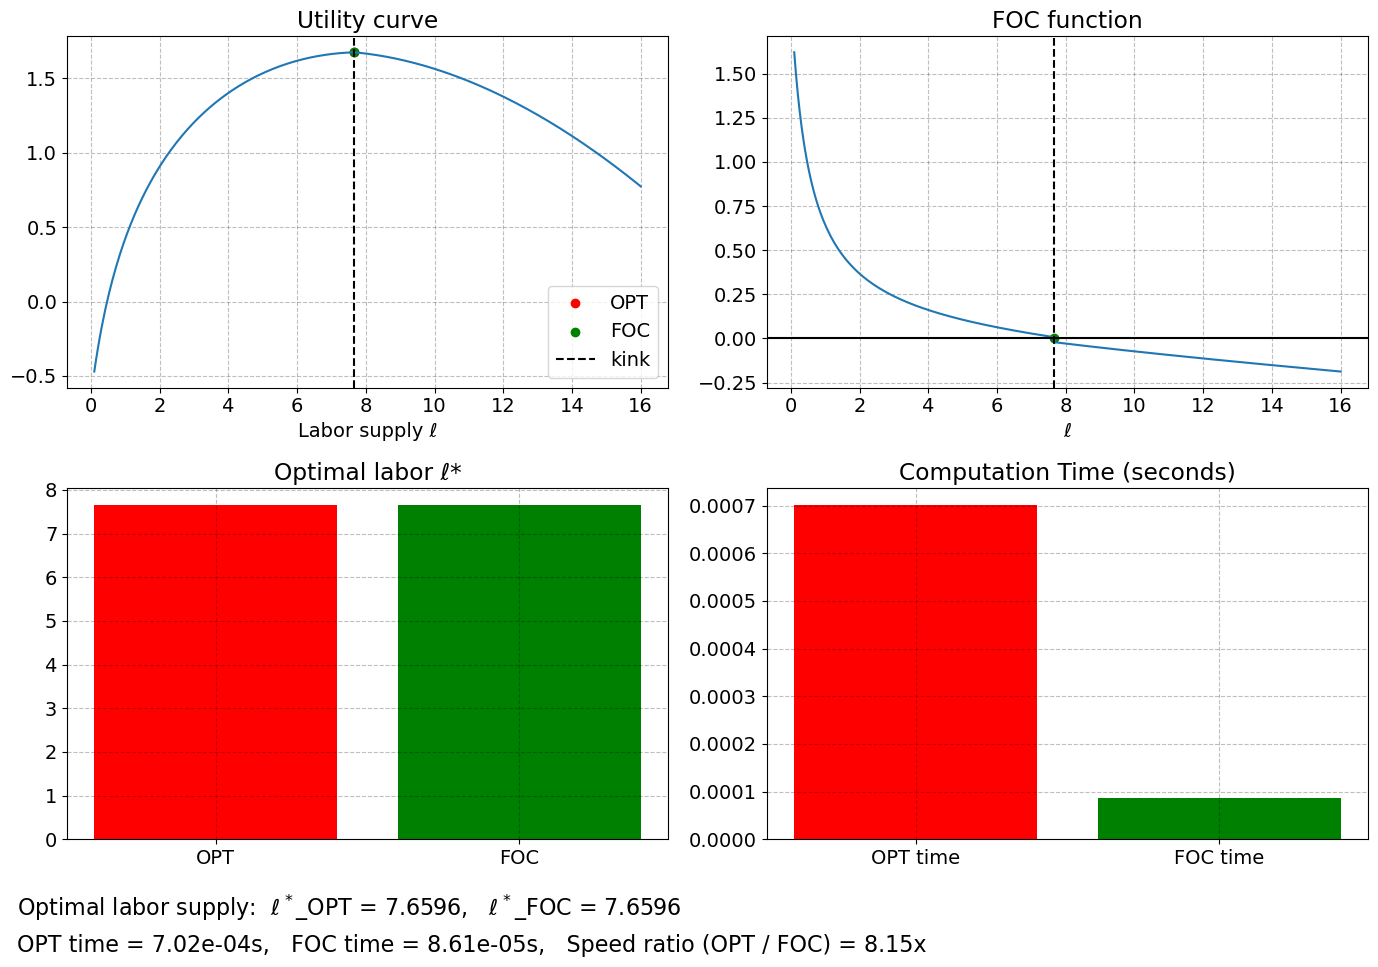

In [37]:
plot_all_in_one_with_kink(1.175, tau_opt, zeta_opt)

At p=1.175, we’re again at a corner solution, with the worker choosing exactly the labor level at the kink. Just like in Exercise 1, the numerical optimizer turns out to be much slower than the FOC-based method. This stays true even after running the code several times. The reason for me is the same as in Excercise 1. At a corner solution, we code the FOC method to jump straight to the right value, while the numerical optimizer still searches over the whole domain.

## Excercise: Repeat for p_i = 1.5

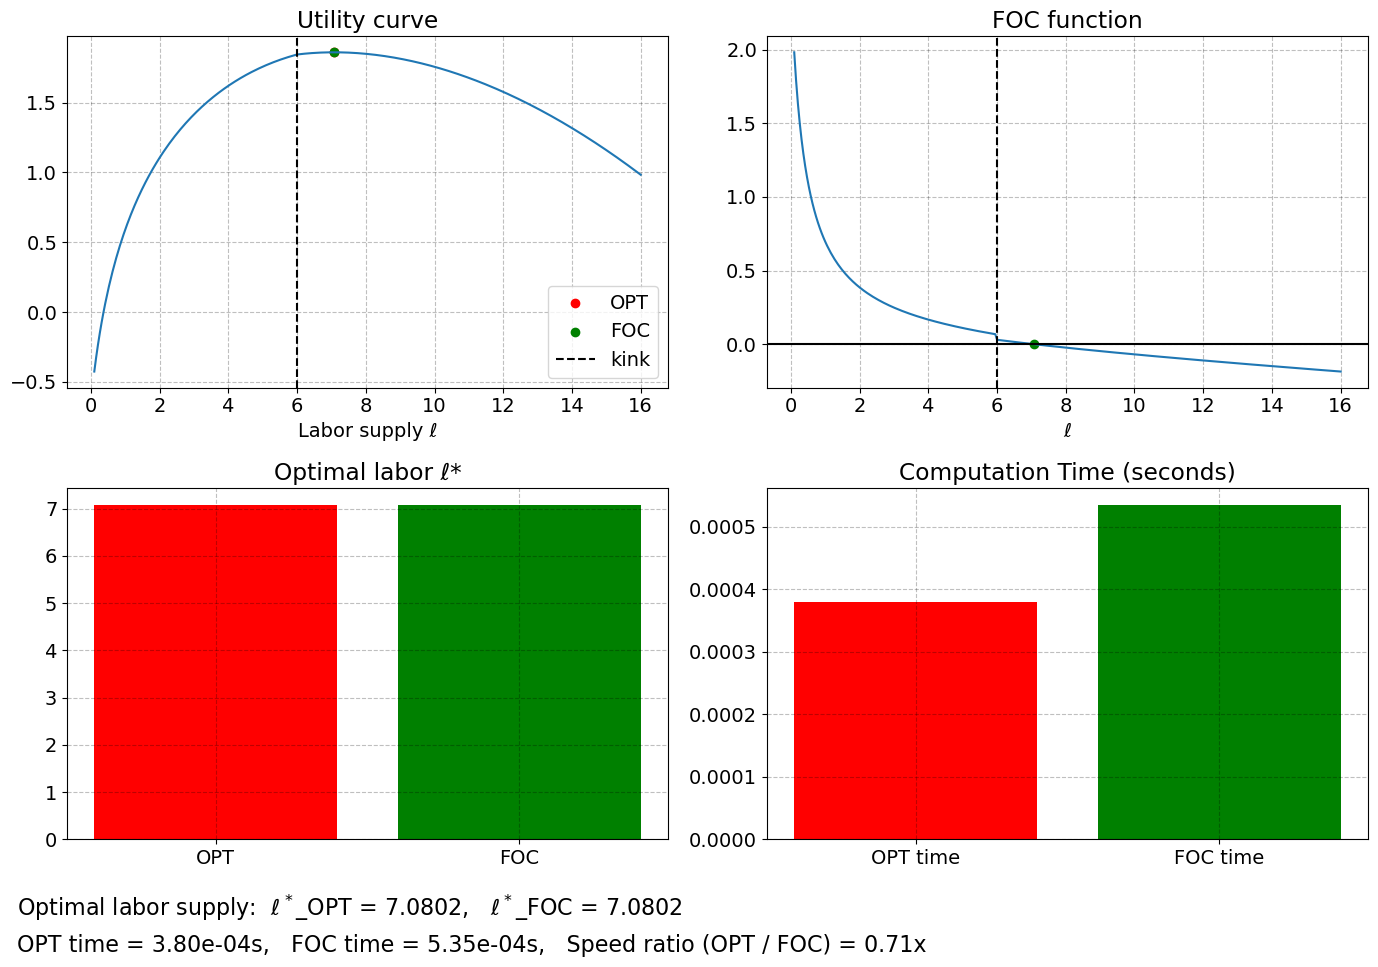

In [38]:
plot_all_in_one_with_kink(1.5, tau_opt, zeta_opt)

With p_i at 1.5, the results are the same as with p_i = 1. After running the cell multiple times, the numerical optimizer tends to be a little bit faster on average, with a typical speed ratio of around 0.8. Although the method using FOC is still sometimes faster so again, I cannot say for certain.

## 3.2: Labor supply function

## Excercise: 3.2.1

For Exercise 3.2.1, I again plotted labor supply against productivity using both the numerical optimizer and the FOC-based solution (numerical optimizer first, then FOC). Again, visually, the results look identical.

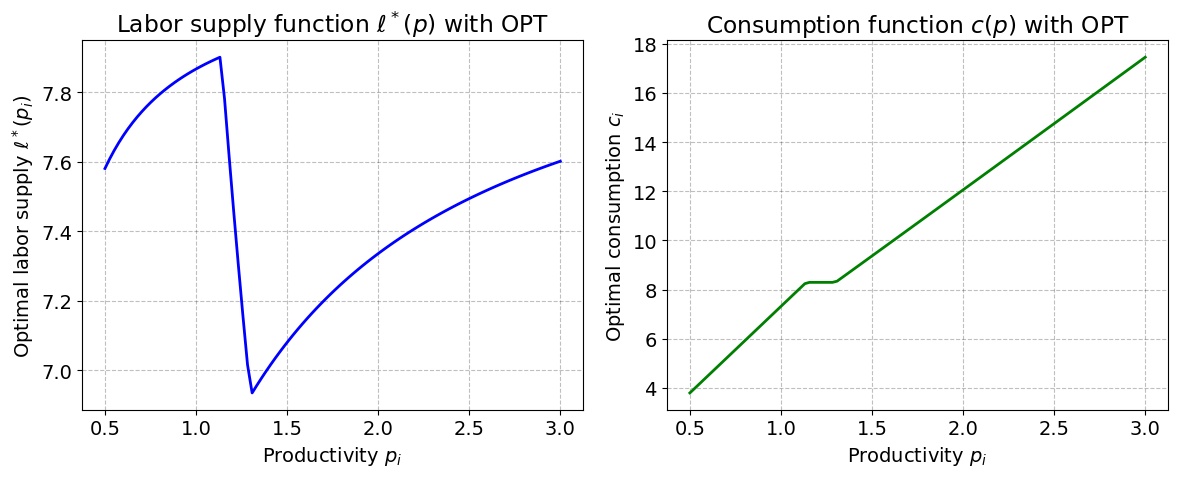

In [39]:
# Plot labor and consumption functions using OPT with kink

def plot_labor_and_consumption_functions_with_kink_OPT(tau_star, zeta_star, kappa=9, omega=0.2):

    # --- 1: Build worker with tax parameters ---
    par = {
        'tau': tau_star,
        'zeta': zeta_star,
        'kappa': kappa,
        'omega': omega
    }
    worker = WorkerClass(par)

    # --- 2: Productivity grid ---
    ps = np.linspace(0.5, 3.0, 100)

    # storage
    ells_opt = np.zeros_like(ps)
    cons_opt = np.zeros_like(ps)

    # --- 3: Solve for each p ---
    for i, p in enumerate(ps):
        sol = worker.optimal_choice(p)
        ells_opt[i] = sol.ell
        cons_opt[i] = sol.c

    # --- 4: Plot ---
    fig, ax = plt.subplots(1, 2, figsize=(12,5))

    # PANEL 1: Labor supply
    ax[0].plot(ps, ells_opt, color="blue", linewidth=2)
    ax[0].set_xlabel("Productivity $p_i$")
    ax[0].set_ylabel("Optimal labor supply $\\ell^*(p_i)$")
    ax[0].set_title("Labor supply function $\\ell^*(p)$ with OPT")
    ax[0].grid(True)

    # PANEL 2: Consumption
    ax[1].plot(ps, cons_opt, color="green", linewidth=2)
    ax[1].set_xlabel("Productivity $p_i$")
    ax[1].set_ylabel("Optimal consumption $c_i$")
    ax[1].set_title("Consumption function $c(p)$ with OPT")
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()
plot_labor_and_consumption_functions_with_kink_OPT(tau_opt, zeta_opt, kappa=9, omega=0.2)

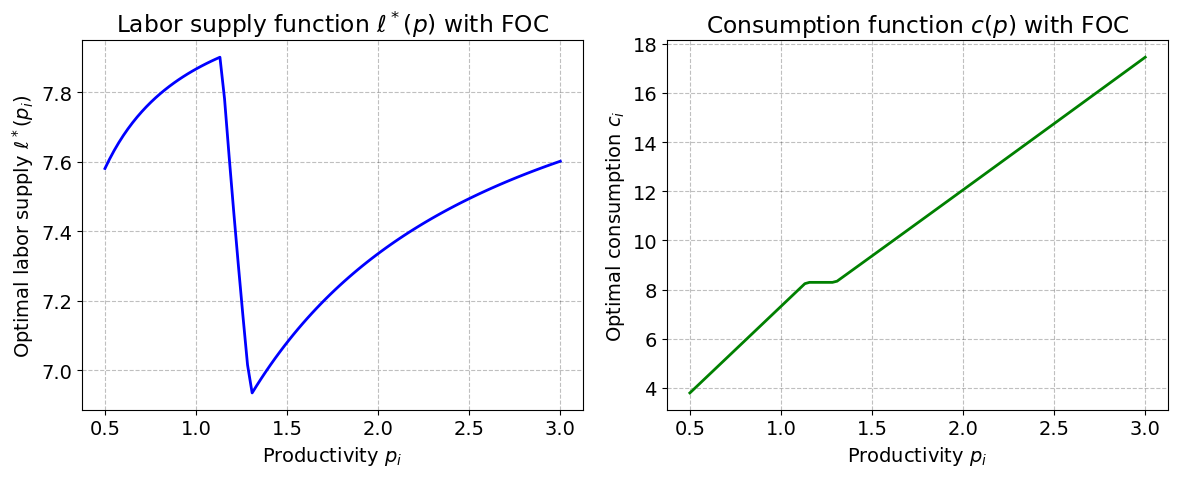

In [40]:
# Plot labor and consumption functions using OPT with kink

def plot_labor_and_consumption_functions_with_kink_FOC(tau_star, zeta_star, kappa=9, omega=0.2):

    # --- 1: Build worker with tax parameters ---
    par = {
        'tau': tau_star,
        'zeta': zeta_star,
        'kappa': kappa,
        'omega': omega
    }
    worker = WorkerClass(par)

    # --- 2: Productivity grid ---
    ps = np.linspace(0.5, 3.0, 100)

    # storage
    ells_opt = np.zeros_like(ps)
    cons_opt = np.zeros_like(ps)

    # --- 3: Solve for each p ---
    for i, p in enumerate(ps):
        sol = worker.optimal_choice_FOC(p)
        ells_opt[i] = sol.ell
        cons_opt[i] = sol.c

    # --- 4: Plot ---
    fig, ax = plt.subplots(1, 2, figsize=(12,5))

    # PANEL 1: Labor supply
    ax[0].plot(ps, ells_opt, color="blue", linewidth=2)
    ax[0].set_xlabel("Productivity $p_i$")
    ax[0].set_ylabel("Optimal labor supply $\\ell^*(p_i)$")
    ax[0].set_title("Labor supply function $\\ell^*(p)$ with FOC")
    ax[0].grid(True)

    # PANEL 2: Consumption
    ax[1].plot(ps, cons_opt, color="green", linewidth=2)
    ax[1].set_xlabel("Productivity $p_i$")
    ax[1].set_ylabel("Optimal consumption $c_i$")
    ax[1].set_title("Consumption function $c(p)$ with FOC")
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()
plot_labor_and_consumption_functions_with_kink_FOC(tau_opt, zeta_opt, kappa=9, omega=0.2)

The labor supply curve first rises in a concave way but then drops sharply at the productivity level where the kink starts to bind. Once workers hit this point, optimal labor sharply falls. Only for higher productivity levels (where the marginal benefit of working is high enough even with the top tax) labor supply starts increasing again, again in a concave shape.

The consumption curve is linear in productivity at first. When the kink becomes relevant, consumption flattens out. After that, as productivity keeps rising and working becomes worthwhile again despite the higher tax, consumption continues to increase linearly.


## Excercise: 3.2.2

In [41]:
def compute_proportions_existing(tau_star, zeta_star, kappa=9, omega=0.2):

    # --- 1. Initialize government with the chosen tax parameters ---
    par = {
        'tau': tau_star,
        'zeta': zeta_star,
        'kappa': kappa,
        'omega': omega
    }
    gov = GovernmentClass(par)

    # --- 2. Draw productivities ---
    gov.draw_productivities()
    N = gov.par.N

    # --- 3. Solve all workers using your existing solver ---
    sections = []

    for p in gov.par.ps:
        sol = gov.optimal_choice_FOC(p)
        sections.append(sol.section)

    sections = np.array(sections)

    # --- 4. Compute proportions ---
    prop_below = np.mean(sections == "below")
    prop_kink  = np.mean(sections == "kink")
    prop_above = np.mean(sections == "above")

    # --- 5. Print results ---
    print("="*50)
    print(" Proportion of Workers in Each Section ")
    print("="*50)
    print(f"  ℓᵢᵇ  (below kink) : {prop_below:6.3f}")
    print(f"  ℓᵢᵏ  (at kink)    : {prop_kink:6.3f}")
    print(f"  ℓᵢᵃ  (above kink) : {prop_above:6.3f}")
    print("="*50)

compute_proportions_existing(tau_opt, zeta_opt, kappa=9, omega=0.2)


 Proportion of Workers in Each Section 
  ℓᵢᵇ  (below kink) :  0.740
  ℓᵢᵏ  (at kink)    :  0.150
  ℓᵢᵃ  (above kink) :  0.110


## 3.3: Public good

## Excercise: 3.3.1

In [42]:
def compare_SWF_with_and_without_kink(tau_star, zeta_star):

    # === 1. Government WITHOUT kink ===
    par_no_kink = {
        'tau': tau_star,
        'zeta': zeta_star,
        'kappa': np.nan,   # no kink
        'omega': 0.0
    }

    gov_no_kink = GovernmentClass(par_no_kink)
    gov_no_kink.draw_productivities()
    gov_no_kink.solve_workers()
    SWF_no_kink = gov_no_kink.SWF()


    # === 2. Government WITH kink ===
    par_kink = {
        'tau': tau_star,
        'zeta': zeta_star,
        'kappa': 9.0,
        'omega': 0.2
    }

    gov_kink = GovernmentClass(par_kink)
    gov_kink.draw_productivities()
    gov_kink.solve_workers()
    SWF_kink = gov_kink.SWF()


    # === 3. Pretty formatted output ===
    print("="*55)
    print(" Social Welfare Comparison (With vs. Without Top Tax) ")
    print("="*55)
    print(f"  SWF without top tax : {SWF_no_kink:12.4f}")
    print(f"  SWF with top tax    : {SWF_kink:12.4f}")
    print("-"*55)
    print(f"  Δ SWF (kink − no kink): {SWF_kink - SWF_no_kink:12.4f}")
    print("="*55)

compare_SWF_with_and_without_kink(tau_opt, zeta_opt)


 Social Welfare Comparison (With vs. Without Top Tax) 
  SWF without top tax :     222.3841
  SWF with top tax    :     221.9338
-------------------------------------------------------
  Δ SWF (kink − no kink):      -0.4503


## Excercise: 3.3.2

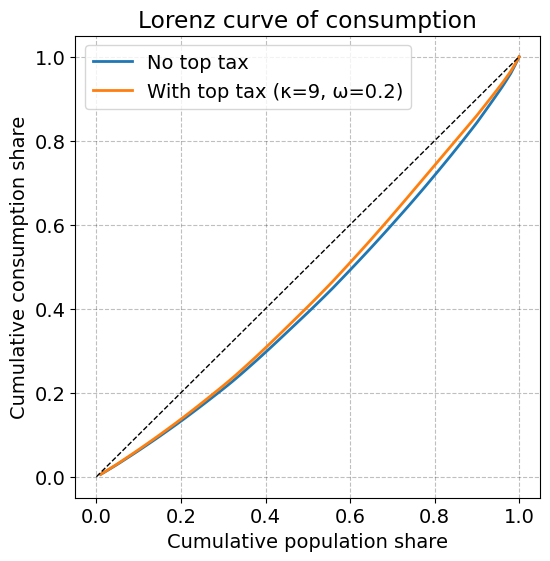

In [43]:
def lorenz_curve(values):
    """Return Lorenz curve points for a vector."""
    x = np.sort(values)
    cumvals = np.cumsum(x)
    cumvals = cumvals / cumvals[-1]   # normalize
    n = len(values)
    p = np.arange(1, n+1) / n         # population shares
    return p, cumvals


def plot_lorenz_consumption_change(tau_star, zeta_star):
    
    # ------- 1. Government WITHOUT top tax -------
    par_no_kink = {
        'tau': tau_star,
        'zeta': zeta_star,
        'kappa': np.nan,
        'omega': 0.0
    }
    gov0 = GovernmentClass(par_no_kink)
    gov0.draw_productivities()
    gov0.solve_workers()
    c0 = gov0.sol.c_opt.copy()   # consumption


    # ------- 2. Government WITH top tax -------
    par_kink = {
        'tau': tau_star,
        'zeta': zeta_star,
        'kappa': 9.0,
        'omega': 0.2
    }
    gov1 = GovernmentClass(par_kink)
    gov1.draw_productivities()
    gov1.solve_workers()
    c1 = gov1.sol.c_opt.copy()


    # ------- 3. Lorenz curves -------
    p0, L0 = lorenz_curve(c0)
    p1, L1 = lorenz_curve(c1)


    # ------- 4. Plot -------
    plt.figure(figsize=(6,6))
    plt.plot(p0, L0, label="No top tax", linewidth=2)
    plt.plot(p1, L1, label="With top tax (κ=9, ω=0.2)", linewidth=2)
    plt.plot([0,1], [0,1], "k--", linewidth=1)  # 45° line

    plt.xlabel("Cumulative population share")
    plt.ylabel("Cumulative consumption share")
    plt.title("Lorenz curve of consumption")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_lorenz_consumption_change(tau_opt, zeta_opt)

Excercise 3.3.1 and 3.3.2 show an interesting insight: Introducing a top tax slightly reduces overall social welfare (by about 0.45 units), which suggests that the kink’s negative effect on workers’ labor supply ends up costing more than the redistribution helps in terms of Social Welfare (for the given parameters). However, the Lorenz curves show that the top tax also reduces consumption inequality: the orange curve lies consistently lies closer to the equality line, meaning low-income workers receive a larger share of total consumption.

## Excercise: 3.3.3

Here I perform a brute-force search over a grid of possible top-tax cutoff values (κ) and top tax rates (ω) to see whether any combination can improve social welfare relative to the no-kink baseline.

In [44]:
def brute_force_optimal_kink(tau_star, zeta_star,
                             kappa_grid=None, omega_grid=None):

    # Default reasonable grids
    if kappa_grid is None:
        kappa_grid = np.linspace(5, 20, 30)   # kink positions
    if omega_grid is None:
        omega_grid = np.linspace(0.0, 0.8, 21)  # top tax rates

    # --- 1. SWF baseline (no kink) ---
    par_no_kink = {
        'tau': tau_star,
        'zeta': zeta_star,
        'kappa': np.nan,
        'omega': 0.0
    }
    gov0 = GovernmentClass(par_no_kink)
    gov0.draw_productivities()
    gov0.solve_workers()
    SWF0 = gov0.SWF()

    best = {
        "SWF": -np.inf,
        "kappa": None,
        "omega": None
    }

    # --- 2. Brute-force search ---
    for kappa in kappa_grid:
        for omega in omega_grid:

            params = {
                'tau': tau_star,
                'zeta': zeta_star,
                'kappa': kappa,
                'omega': omega
            }

            gov = GovernmentClass(params)
            gov.draw_productivities()
            gov.solve_workers()
            SWF = gov.SWF()

            if SWF > best["SWF"]:
                best["SWF"] = SWF
                best["kappa"] = kappa
                best["omega"] = omega

    # --- 3. Pretty formatted output ---
    print("="*60)
    print("      Brute-force Search over (κ, ω): Welfare Results")
    print("="*60)

    print(f"  Baseline SWF (no top tax) : {SWF0:12.4f}")
    print(f"  Best SWF with kink        : {best['SWF']:12.4f}")
    print("-"*60)
    print(f"  Δ SWF (kink − no kink)    : {best['SWF'] - SWF0:12.4f}")

    print("\nOptimal parameters:")
    print("-"*60)
    print(f"  κ* (top tax cutoff value) : {best['kappa']:12.4f}")
    print(f"  ω* (top tax rate)         : {best['omega']:12.4f}")
    print("="*60)

    return best, SWF0


best, SWF0 = brute_force_optimal_kink(tau_opt, zeta_opt)


      Brute-force Search over (κ, ω): Welfare Results
  Baseline SWF (no top tax) :     222.3841
  Best SWF with kink        :     222.3874
------------------------------------------------------------
  Δ SWF (kink − no kink)    :       0.0034

Optimal parameters:
------------------------------------------------------------
  κ* (top tax cutoff value) :      12.7586
  ω* (top tax rate)         :       0.0400


The brute-force search shows that for given parameters ζ* and τ*, introducing a top tax with the displayed values can raise social welfare compared to no top tax.

# 4 Change the Utility function to CES

For the Extension, I chose to examine how some aspects of our model change, when we vary the **σ parameter** in the CES utility function. Up until now, we have worked with the special case **σ = 1**, which yields the familiar logarithmic utility, $\log(c)$. More generally, the CES utility function for consumption is

$$
u(c) =
\begin{cases}
\dfrac{c^{\,1-\sigma} - 1}{1-\sigma}, & \sigma \neq 1, \\[8pt]
\log(c), & \sigma = 1,
\end{cases}
$$

where $\sigma > 0$ governs the curvature of preferences (and the degree of risk aversion).

To do so, I added a parameter for $\sigma$ and adjusted the utility and FOC functions in the Worker.py script. Unless specified otherwise, the utility function defaults to $\log(c)$, which is the case used throughout Exercises 1–3.


First, I plot utility as a function of labor supply for $\sigma = 1, 3$ and $5$ and $p = 1$ to see how the shape of the utility function changes as $\sigma$ increases.


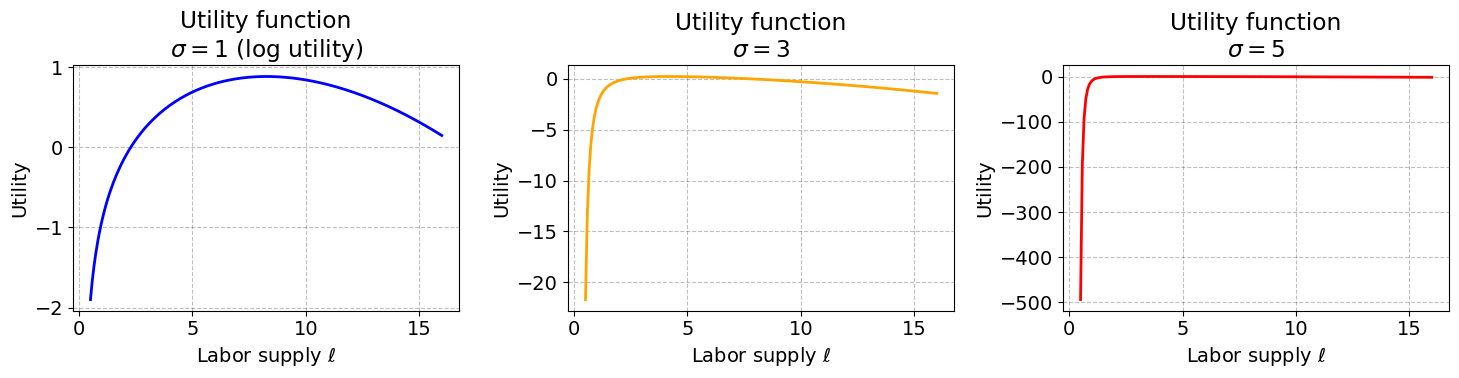

In [45]:
def compare_utility_sigma_extreme(p=1.0):

    sigmas = [1, 3, 5]
    labels = [
        r"$\sigma = 1$ (log utility)",
        r"$\sigma = 3$",
        r"$\sigma = 5$"
    ]
    colors = ["blue", "orange", "red"]

    plt.figure(figsize=(15,4))

    for i, sigma in enumerate(sigmas):

        worker = WorkerClass({'sigma': sigma})

        # labor grid
        ells = np.linspace(0.5, worker.par.ell_max, 200)

        # compute utilities
        Us = np.array([worker.value_of_choice(p, ell) for ell in ells])

        # subplot
        ax = plt.subplot(1, 3, i+1)
        ax.plot(ells, Us, color=colors[i], linewidth=2)
        ax.set_title(f"Utility function\n{labels[i]}")
        ax.set_xlabel(r"Labor supply $\ell$")
        ax.set_ylabel("Utility")
        ax.grid(True)

    plt.tight_layout()
    plt.show()
compare_utility_sigma_extreme(p=1.0)

The three panels illustrate how the curvature of the utility function changes as $\sigma$ increases.  
For $\sigma = 1$ (log utility), the function is smooth and concave: utility rises steadily with consumption before eventually declining as labor becomes too costly.  
When $\sigma = 3$, the utility function becomes much steeper at low consumption levels and then flattens quickly, reflecting stronger curvature and a much sharper dislike for low consumption.  
For $\sigma = 5$, these patterns intensify even further: utility drops extremely rapidly at low consumption levels and becomes nearly flat once consumption is moderate, indicating extremely strong diminishing marginal utility of cunsumption.


Next, I plot optimal labor supply as a function of $\sigma$ to see how it behaves as $\sigma$ increases:

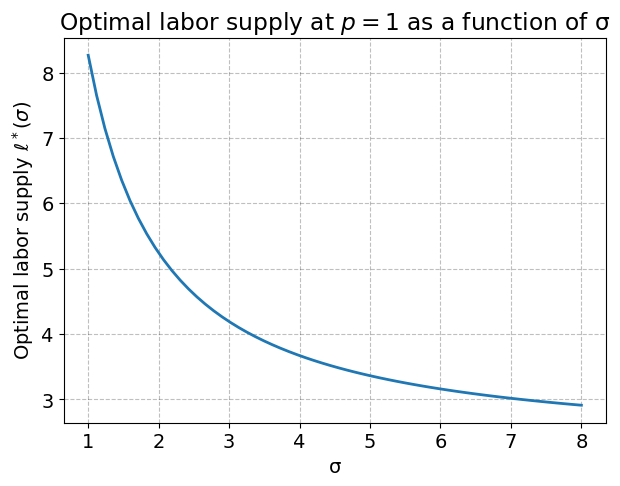

In [46]:
def plot_labor_supply_vs_sigma(p=1.0):

    sigmas = np.linspace(1.0, 8.0, 60)   # risk aversion grid
    ells = np.zeros_like(sigmas)

    for i, sigma in enumerate(sigmas):
        worker = WorkerClass(par={'sigma': sigma})
        sol = worker.optimal_choice_FOC(p)
        ells[i] = sol.ell

    plt.figure(figsize=(7,5))
    plt.plot(sigmas, ells, linewidth=2)
    plt.xlabel("σ")
    plt.ylabel(r"Optimal labor supply $\ell^*(\sigma)$")
    plt.title(r"Optimal labor supply at $p=1$ as a function of σ")
    plt.grid(True)
    plt.show()
plot_labor_supply_vs_sigma(p=1.0)

Optimal labor supply is a convex function in $\sigma$ and falls as $\sigma$ increases. This is not surprising and follows directly from the properties of the CES utility function.

As $\sigma$ increases, the utility function becomes more curved, meaning the marginal utility of consumption falls much faster as consumption rises. In the CES specification,

$$
u(c) = \frac{c^{\,1-\sigma} - 1}{1 - \sigma},
$$

and the marginal utility of consumption is

$$
u'(c) = c^{-\sigma}.
$$

We can see that a larger value of $\sigma$ makes $u'(c)$ decline more sharply in $c$: small increases in consumption quickly become nearly worthless. This means the additional consumption gained from supplying extra labor contributes very little to utility, while the disutility from working more remains unchanged.

Because the gain from working more shrinks while the cost of labor stays the same, the optimal labor supply naturally falls as $\sigma$ increases: workers prefer to work less because the extra consumption produced by additional labor no longer provides enough marginal utility to justify the effort.

To illustrate this fact, I plot the FOC of our value of choice for $\sigma = 1, 3$ and $5$.



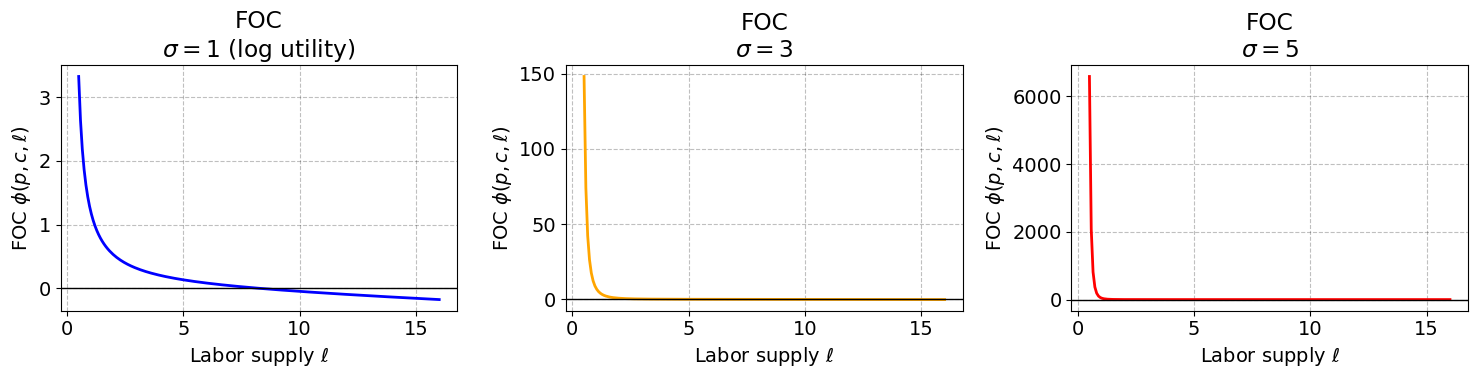

In [47]:
def compare_FOC_sigma(p=1.0):

    sigmas = [1, 3, 5]
    labels = [
        r"$\sigma = 1$ (log utility)",
        r"$\sigma = 3$",
        r"$\sigma = 5$"
    ]
    colors = ["blue", "orange", "red"]

    plt.figure(figsize=(15,4))

    for i, sigma in enumerate(sigmas):

        worker = WorkerClass({'sigma': sigma})

        # labor grid
        ells = np.linspace(0.5, worker.par.ell_max, 200)

        # compute FOCs
        FOCs = np.array([worker.FOC(p, ell) for ell in ells])

        # subplot
        ax = plt.subplot(1, 3, i+1)
        ax.plot(ells, FOCs, color=colors[i], linewidth=2)
        ax.axhline(0, color='black', linewidth=1)
        ax.set_title(f"FOC\n{labels[i]}")
        ax.set_xlabel(r"Labor supply $\ell$")
        ax.set_ylabel(r"FOC $\phi(p,c,\ell)$")
        ax.grid(True)

    plt.tight_layout()
    plt.show()

# Run it
compare_FOC_sigma(p=1.0)


The last thing I want to know is, for a given $\sigma$, which tax rates maximize Social Welfare. To do this, I plot the optimal tax rate $\tau$ and the optimal lump-sum value $\zeta$ that maximize Social Welfare as functions of $\sigma$.

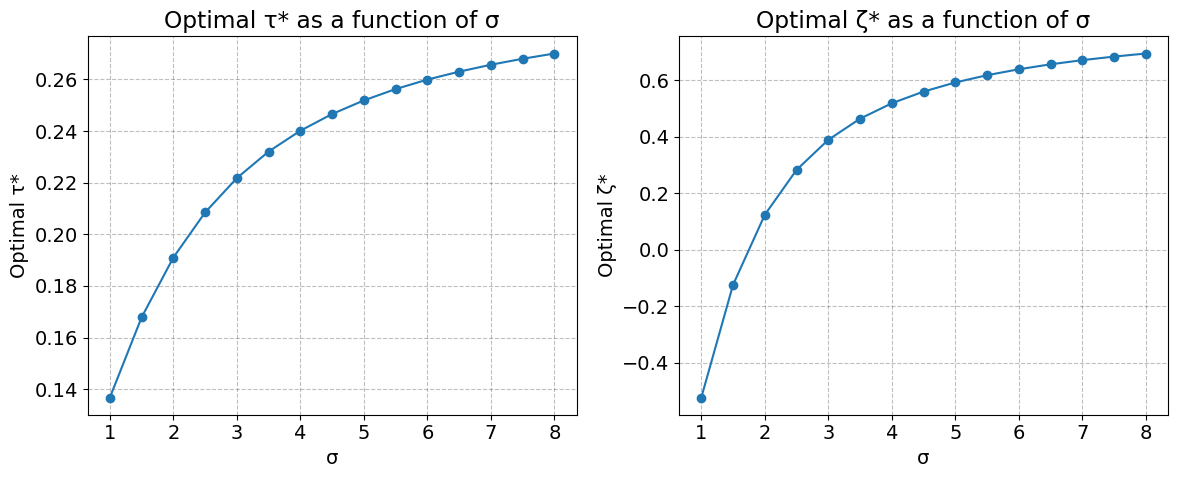

In [48]:
def plot_optimal_taxes_vs_sigma(sigmas):

    tau_list  = []
    zeta_list = []
    SWF_list  = []

    for sigma in sigmas:

        # Create government with given sigma
        gov = GovernmentClass(par={'sigma': sigma})
        gov.draw_productivities()

        # Optimize taxes
        tau_opt, zeta_opt, SWF_opt = gov.optimal_taxes(-1.0, -0.1)

        tau_list.append(tau_opt)
        zeta_list.append(zeta_opt)
        SWF_list.append(SWF_opt)

    # --- Plotting ---
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Left: τ*(σ)
    ax[0].plot(sigmas, tau_list, marker='o')
    ax[0].set_title("Optimal τ* as a function of σ")
    ax[0].set_xlabel("σ")
    ax[0].set_ylabel("Optimal τ*")
    ax[0].grid(True)

    # Right: ζ*(σ)
    ax[1].plot(sigmas, zeta_list, marker='o')
    ax[1].set_title("Optimal ζ* as a function of σ")
    ax[1].set_xlabel("σ")
    ax[1].set_ylabel("Optimal ζ*")
    ax[1].grid(True)

    plt.tight_layout()
    plt.show()

    return tau_list, zeta_list, SWF_list

sigmas = np.linspace(1, 8, 15)
tau_vals, zeta_vals, SWF_vals = plot_optimal_taxes_vs_sigma(sigmas)

We can see that both the optimal tax rate $\tau$ and the optimal lump-sum value $\zeta$ increase, as $\sigma$ increases.

I think this gives a pretty interesting economic insight. Since $\sigma$ captures how risk-averse people are (higher $\sigma$ means higher risk aversion), the results imply that the more risk-averse a population is, the higher optimal taxes it should face in order to maximize social welfare. At the same time, we saw that optimal labor supply falls as $\sigma$ increases.

In other words:
When workers become more risk-averse, they both choose to work less and the welfare-maximizing government ends up taxing them more!